In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
import nltk
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import statsmodels.api as sm
import statsmodels.formula.api as smf # importing stats model api for multiple regression




# Data Cleaning

## Stopwords

These are words that do not themselves have significant meaning for polarity purposes. 

In [2]:
# Download stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Mackdig25/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#example of stopwords
sw = stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

## Useful Functions for Data Cleaning

In [4]:
def stopwords(text):
    '''a function for removing the stopword'''
    #removing the stop words and lowercasing the selected words
    #text = [str(word)for word in text if type(word) == float]
    text = [word.lower() for word in str(text).split() if word.lower() not in sw]
    #joining the list of words with space seperator
    return ' '.join(text)

In [5]:
def remove_emoji(string):
    """a function to remove emojis"""
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [6]:
# Reading in Raw Data
data_rough = pd.read_csv('BobChat Conversations - All Data.csv')
data_rough[['Message']][:10]

,Message
0,Im lonely
1,Kill me
2,🛠 Self-Development
3,日本語を知っている？
4,Bus A
5,✨ Get Involved
6,Drop-In Hours
7,i need security
8,security help
9,public safety


## Cleaning Messages for Analysis

### Remove Punctuation

In [7]:
data = data_rough.copy()
data['Message'] = data['Message'].str.replace(',', '') # Remove Commas
data['Message'] = data['Message'].str.replace('.', '') # Remove Periods
data['Message'] = data['Message'].str.replace('"', '') # Removes Quotes
data['Message'] = data['Message'].str.replace(';', '') # Remove Semicolon
data['Message'] = data['Message'].str.replace(':', '') # Remove Colon
data['Message'] = data['Message'].str.replace('?', '') # Remove Question mark
data['Message'] = data['Message'].str.replace('&', '') # Remove And Symbol
data['Message'] = data['Message'].str.replace('!', '') # Remove Exclimation Point
data['Message'] = data['Message'].str.replace('-', ' ') # Remove Dash Point
data['Message'] = data['Message'].str.replace('_', ' ') # Remove Underscore Point
data[['Message']][:10]

,Message
0,Im lonely
1,Kill me
2,🛠 Self Development
3,日本語を知っている？
4,Bus A
5,✨ Get Involved
6,Drop In Hours
7,i need security
8,security help
9,public safety


### Distribution of Message Length Before Cleaning

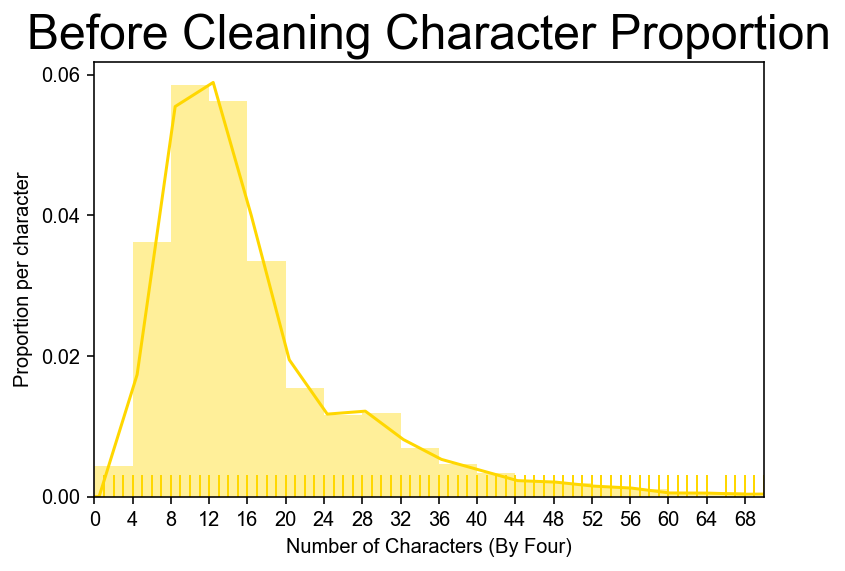

In [8]:
sns.distplot(data_rough['Message'].str.len(),
             rug=True,
             bins=np.arange(0, 70,4),
             axlabel="Number of Characters (By Four)", color = "gold"
            )

sns.set(rc={'figure.figsize':(16,16)})  
sns.set(font_scale = 2)
plt.xlim(0, 70)
plt.xticks(np.arange(0,70,4))
plt.gca().set_ylabel('Proportion per character')
plt.title("Before Cleaning Character Proportion");

### Applying Cleaning Functions

In [9]:
# Applying remove stop words function to messages to remove stopwords
data['Message'] = data['Message'].apply(stopwords) 

# Applying remove_emogi function to messages to remove emojis
data['Message'] = data['Message'].apply(remove_emoji)
data[['Message']][:10]

,Message
0,im lonely
1,kill
2,self development
3,
4,bus
5,get involved
6,drop hours
7,need security
8,security help
9,public safety


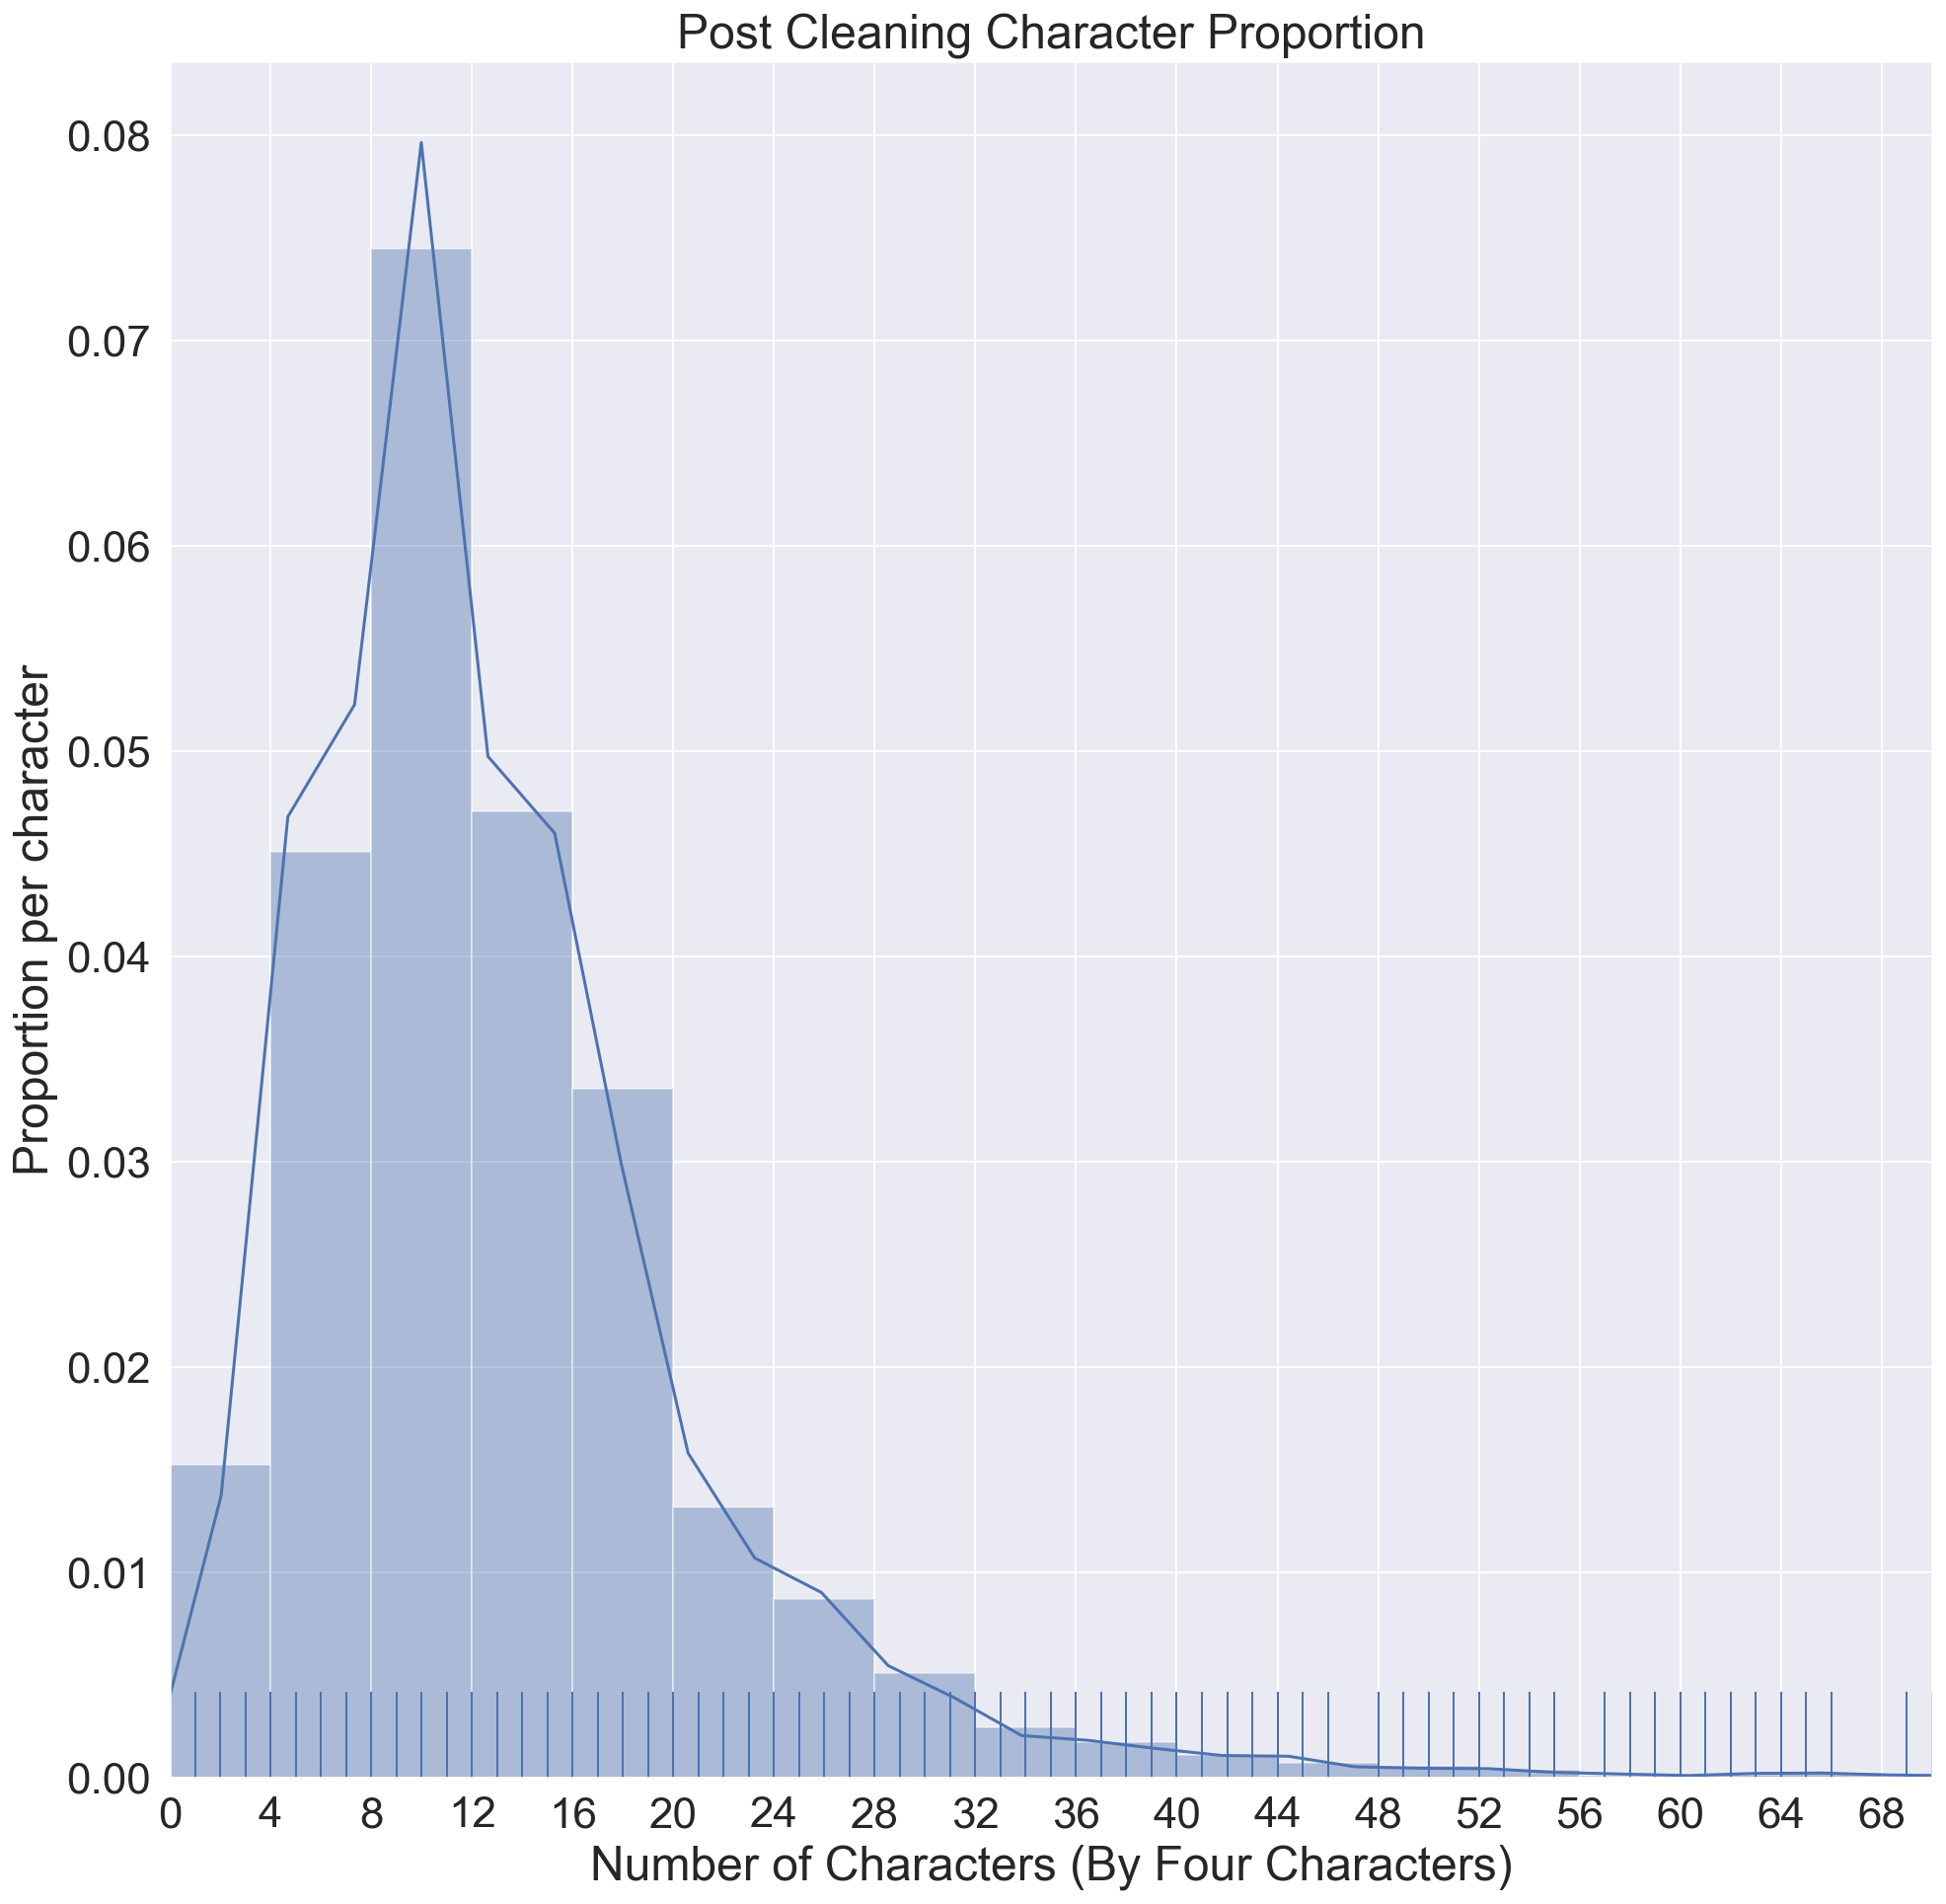

In [10]:
sns.distplot(data['Message'].str.len(),
             rug=True,
             bins=np.arange(0, 70,4),
             axlabel="Number of Characters (By Four Characters)"
            )

sns.set(rc={'figure.figsize':(14,14)})  
sns.set(font_scale = 2)
plt.xlim(0, 70)
plt.xticks(np.arange(0,70,4))
plt.gca().set_ylabel('Proportion per character')
plt.title("Post Cleaning Character Proportion");

Text(0.5, 1.0, 'Pre vs Post Cleaning Character Proportion')

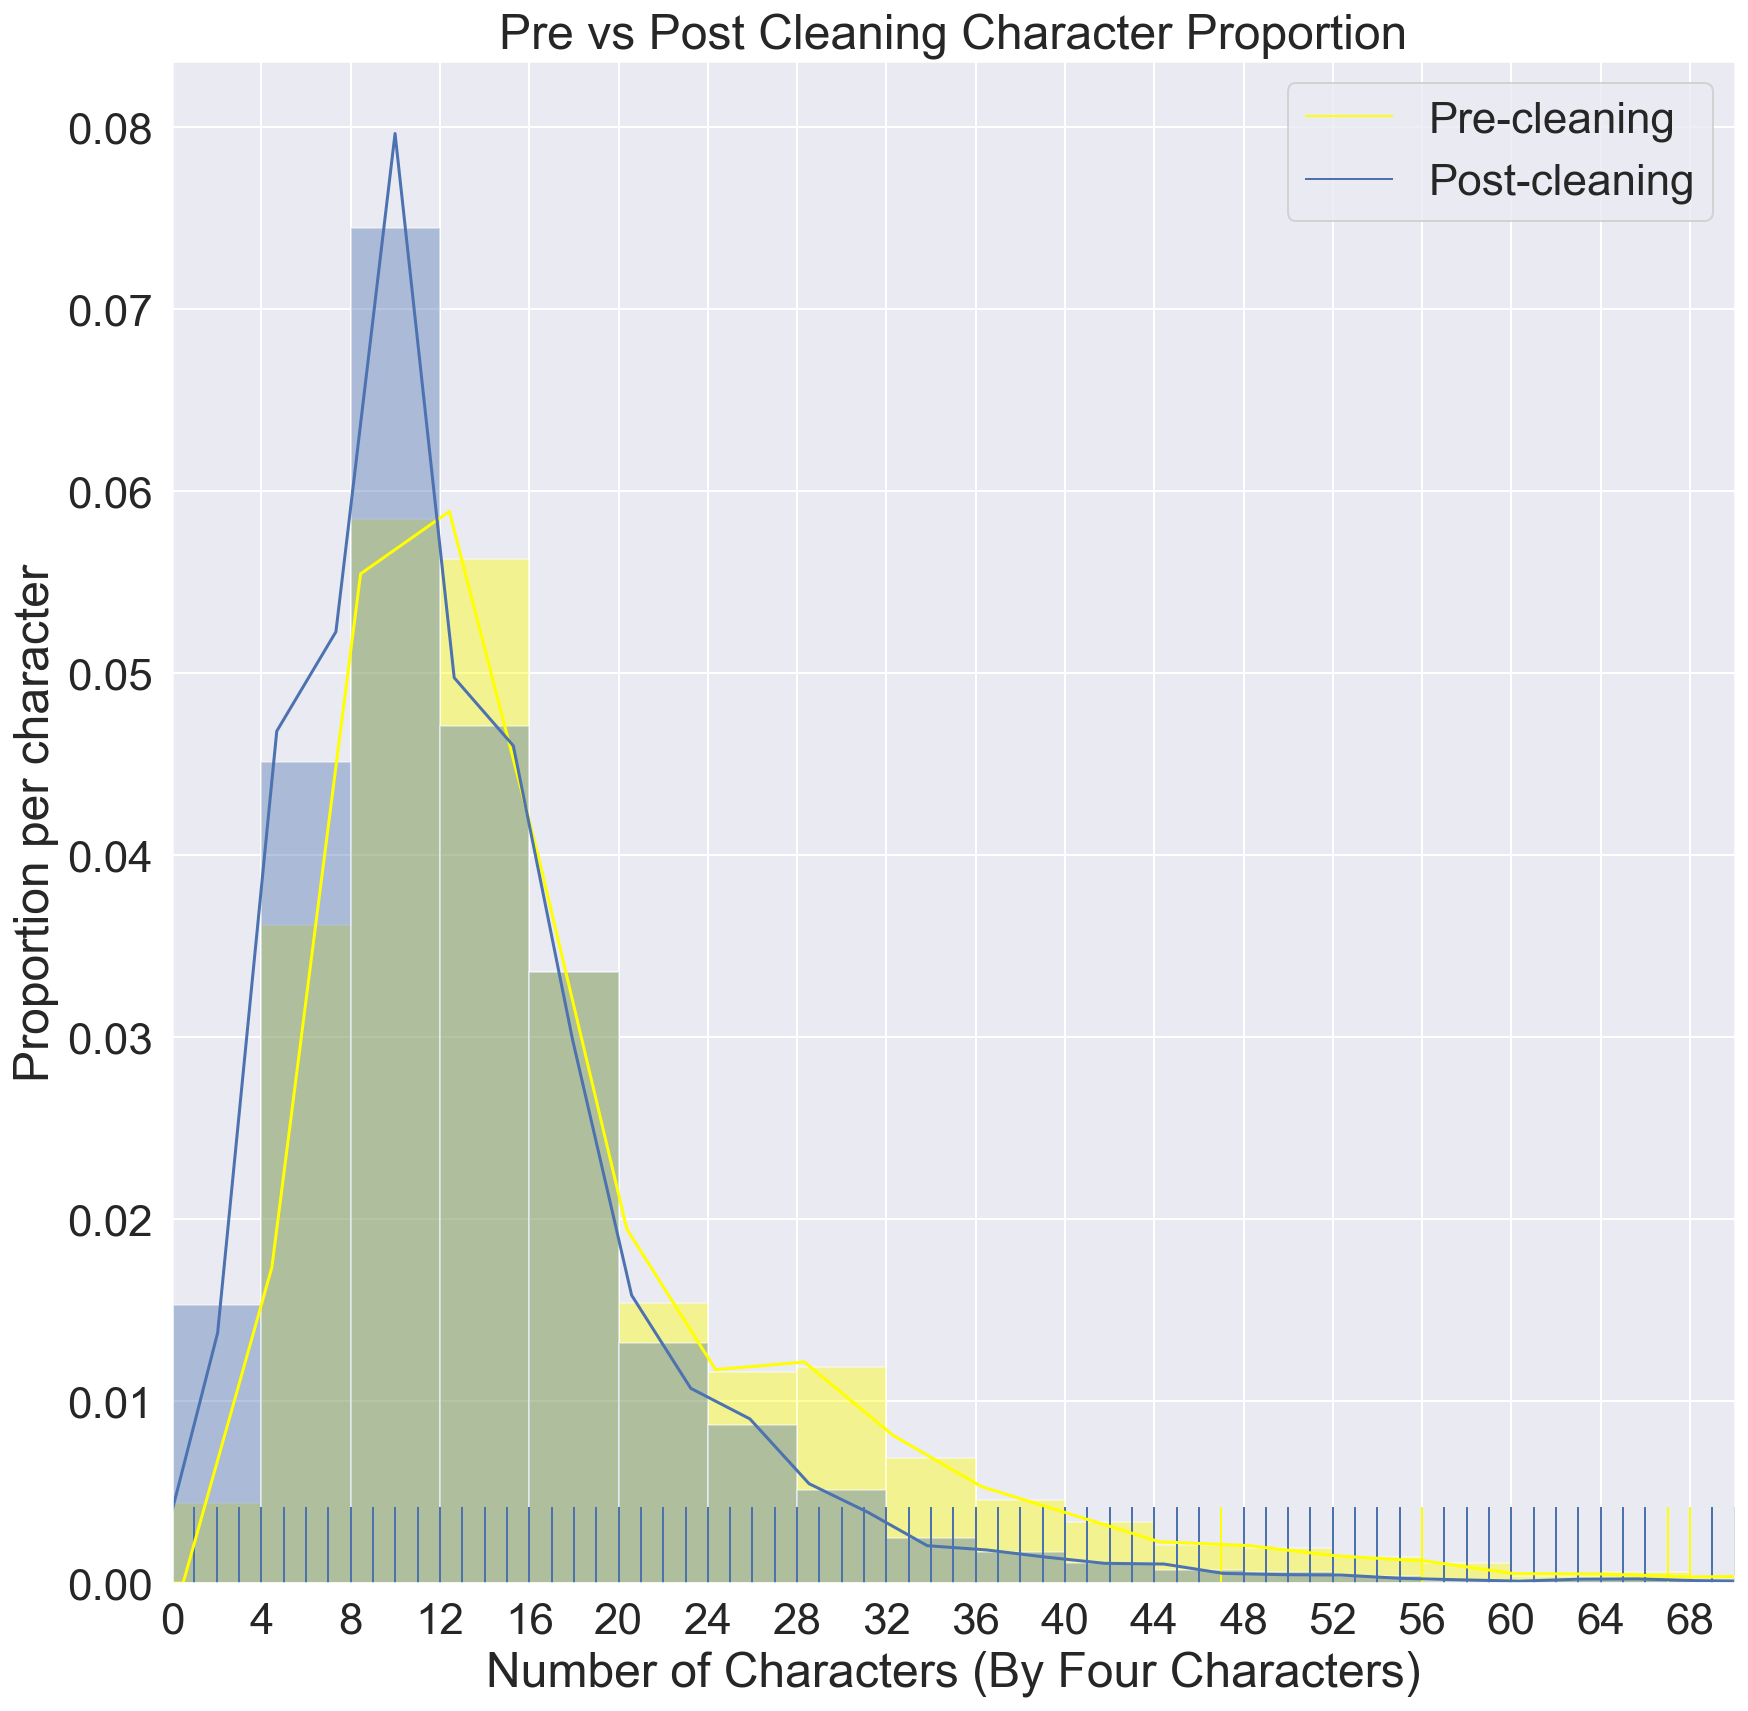

In [11]:
sns.distplot(data_rough['Message'].str.len(),
             rug=True,
             bins=np.arange(0, 70,4),
             axlabel="Number of Characters (By Four)", color = "yellow"
            )
sns.distplot(data['Message'].str.len(),
             rug=True,
             bins=np.arange(0, 70,4),
             axlabel="Number of Characters (By Four Characters)"
            )
sns.set(rc={'figure.figsize':(10,10)})  
sns.set(font_scale = 2)
plt.xlim(0, 70)
plt.legend(labels = ["Pre-cleaning", "Post-cleaning"])
plt.xticks(np.arange(0,70,4))
plt.gca().set_ylabel('Proportion per character')
plt.title("Pre vs Post Cleaning Character Proportion")

### Converting Timestamp from string to datetime


In [12]:
type(data['Timestamp'][0])

str

In [13]:
data['Timestamp']= pd.to_datetime(data['Timestamp'])

type(data["Timestamp"][0])

pandas._libs.tslibs.timestamps.Timestamp

# Analysis

## Data Set Description

### Number of User

In [14]:
#Users = data["User"].unique()
data.head()

,Timestamp,Message,Message Type,Response,Response Type,Response Group,Response Accuracy,Accuracy Diagnosis,Fixed or Improved,Negative Sentiment,Notes
0,2019-02-12 11:19:00,im lonely,Freeform,Sometimes that happens. We can chat a bit if t...,Small Talk,Small Talk,Full,NaN,False,True,NaN
1,2019-02-12 12:13:00,kill,Freeform,If you or another are in a life- or limb-threa...,Emergency,Emergency,Full,NaN,False,True,Reached out to this user to confirm this was t...
2,2019-02-12 12:14:00,self development,Button,For questions about self-development:,Development Menu,Development,Full,NaN,False,False,NaN
3,2019-02-12 12:14:00,,Freeform,Yikes! I couldn't find that. Want me to connec...,Fallback,Fallback,None,No content,False,False,Do you know Japanese? according to Google Tran...
4,2019-02-12 12:29:00,bus,Freeform,Route A offers transportation between Washingt...,Bus A,Public Safety,Full,NaN,False,False,NaN


In [15]:
#print(f"There are {len(Users)} users in the Data Set.")

### Size of Data Set

In [16]:
print(f"There are {data.shape[0]} Rows and {data.shape[1]} Columns currently in the Data Set")

There are 6427 Rows and 11 Columns currently in the Data Set


## Data Creation

### Word Count

In [17]:
# Applying a fucntion to fucntion to count the number of words in a message post cleaning

data["word_count"] = data['Message'].apply(lambda x: len(str(x).split(" ")))


data[['Message','word_count']][:10]

,Message,word_count
0,im lonely,2
1,kill,1
2,self development,3
3,,1
4,bus,1
5,get involved,3
6,drop hours,2
7,need security,2
8,security help,2
9,public safety,2


### Day of the Week

In [18]:
#['weekday'].replace({0: 'Sun', 1 : 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}, inplace = True)

#data['weekeday'] = data[data['Timestamp']].weekday()
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['day_of_week'] = data['Timestamp'].dt.day_name()


### Hour column

In [19]:
data['hour'] = round((data["Timestamp"].dt.hour) + (data["Timestamp"].dt.minute)/60 + (data["Timestamp"].dt.second)/60**2)
data.head()

,Timestamp,Message,Message Type,Response,Response Type,Response Group,Response Accuracy,Accuracy Diagnosis,Fixed or Improved,Negative Sentiment,Notes,word_count,day_of_week,hour
0,2019-02-12 11:19:00,im lonely,Freeform,Sometimes that happens. We can chat a bit if t...,Small Talk,Small Talk,Full,NaN,False,True,NaN,2,Tuesday,11.0
1,2019-02-12 12:13:00,kill,Freeform,If you or another are in a life- or limb-threa...,Emergency,Emergency,Full,NaN,False,True,Reached out to this user to confirm this was t...,1,Tuesday,12.0
2,2019-02-12 12:14:00,self development,Button,For questions about self-development:,Development Menu,Development,Full,NaN,False,False,NaN,3,Tuesday,12.0
3,2019-02-12 12:14:00,,Freeform,Yikes! I couldn't find that. Want me to connec...,Fallback,Fallback,None,No content,False,False,Do you know Japanese? according to Google Tran...,1,Tuesday,12.0
4,2019-02-12 12:29:00,bus,Freeform,Route A offers transportation between Washingt...,Bus A,Public Safety,Full,NaN,False,False,NaN,1,Tuesday,12.0


### Top words 
Using sort we can find the most common words used in our dataset post cleaning. 

In [20]:
# Splitting the string type messages, then counting them
top_words = data['Message'].str.split(expand = True).stack().value_counts()
top_20 = top_words[:20]

### Visual for most common words

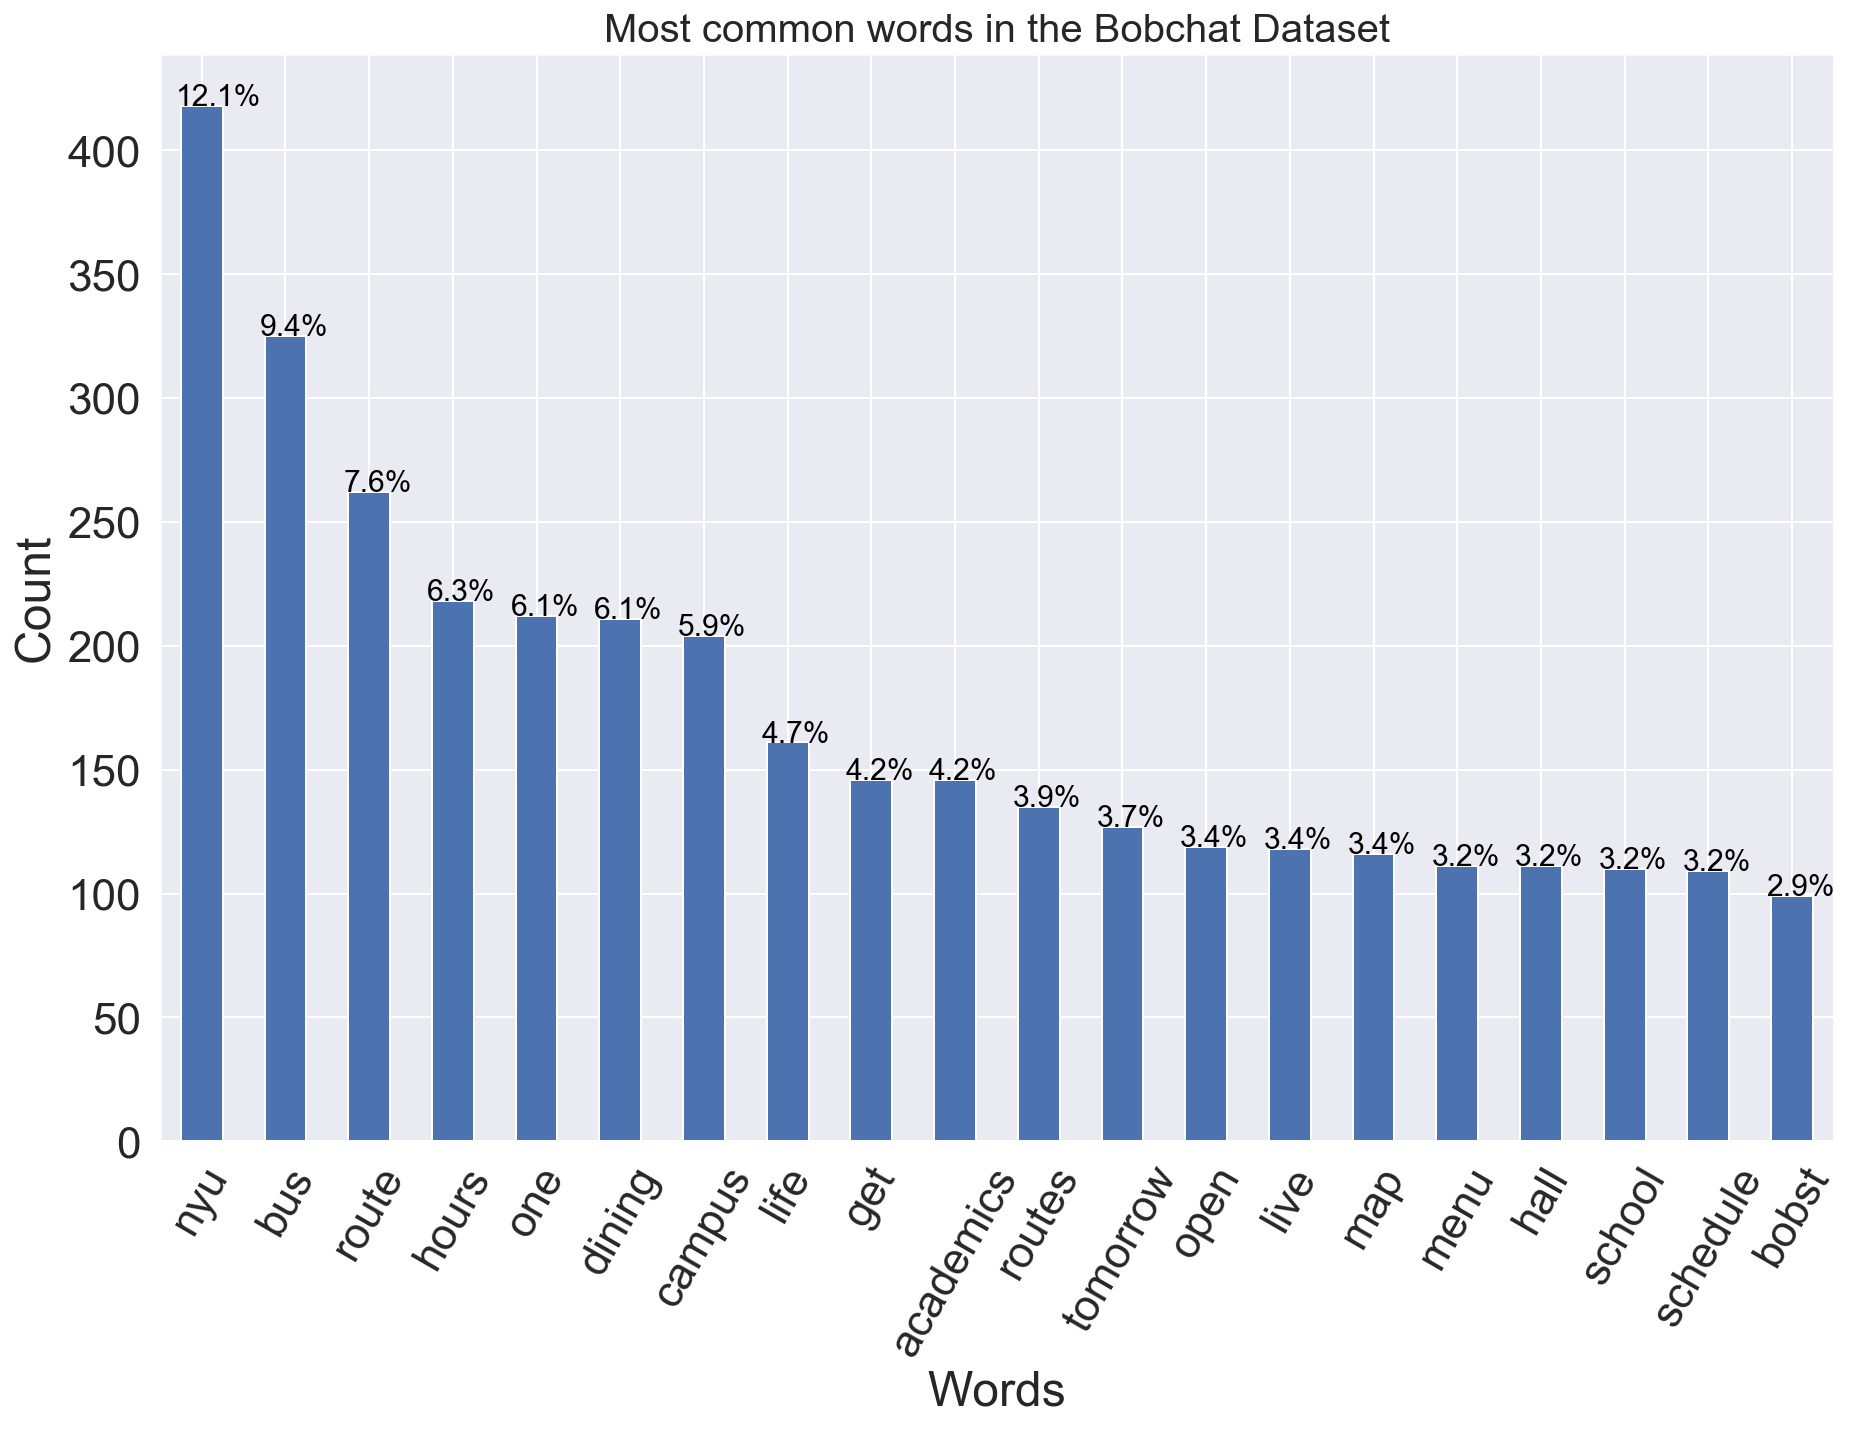

In [21]:
ax = top_20.plot(kind ='bar', figsize = (15,10), rot = 60)

ax.set_alpha(.20)
ax.set_title("Most common words in the Bobchat Dataset", fontsize = 20)
ax.set_ylabel("Count")
ax.set_xlabel("Words")


#create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
    
#set individual bar lables using above list
total = sum(totals)

#set individual bar lables using above list
for i in ax.patches:
    #get_x pulls left or right ; get_height pushes up or down
    ax.text(i.get_x()-.06, i.get_height()+.06, \
           str(round((i.get_height()/total)*100,1))+'%', fontsize=15, color = 'black')


### Most common Pairs of word

In [22]:
def find_ngrams(input_list, n):
    '''a function for joining a number of words together'''
    return list(zip(*[input_list[i:] for i in range(n)]))
from collections import Counter
from itertools import chain

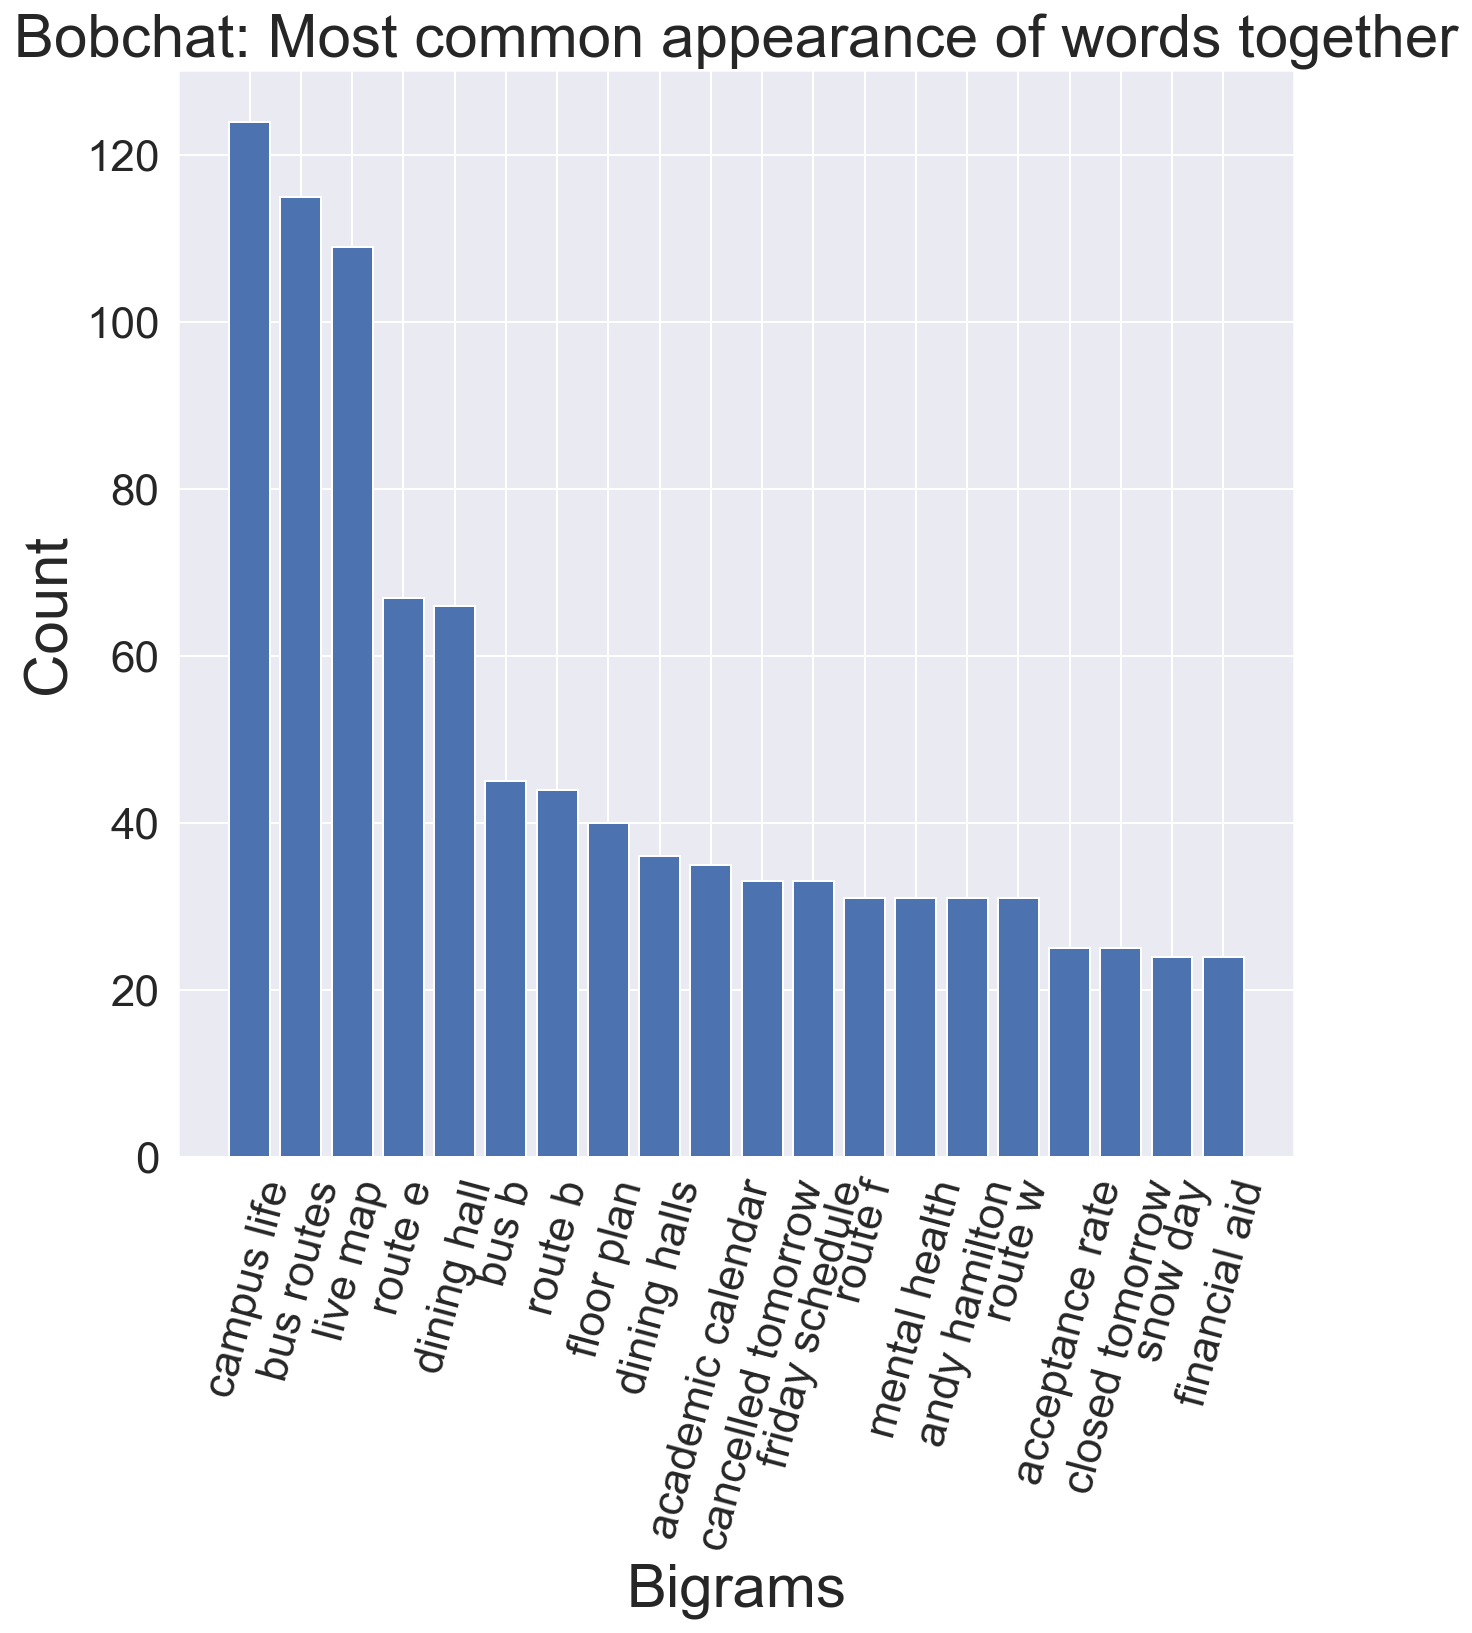

In [23]:
pairs = data['Message'].map(lambda x: find_ngrams(x.split(' '), 2)).to_frame()
pairs
new_pairs = []
for p in pairs["Message"]:
    if p != []:
        new_pairs.append(p)

drop_word = ''
newest_pairs = []
for pair in new_pairs:
    
    if drop_word in chain(*pair):
        continue
    else:
        newest_pairs.append(pair)

newest_pairs

# Bigram Frequency Counts
bigrams = newest_pairs
bigrams = list(chain(*bigrams))
bigrams = [(x.lower(), y.lower()) for x,y in bigrams]


bigram_counts = Counter(bigrams)


bigram_counts = bigram_counts.most_common()
top20_bigram = bigram_counts[:20]
keys = [b[0] for b in top20_bigram]

values = [b[1] for b in top20_bigram]
x = []
for t in keys:
    x.append(" ".join(t))
x
plt.bar(x, values)
sns.set(rc={'figure.figsize':(18,10)})  
sns.set(font_scale = 2)

plt.xticks(range(20),rotation=75)
plt.xlabel('Bigrams', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.title("Bobchat: Most common appearance of words together", fontsize=30)
plt.show()





### What is the Most Active Hour For Conversations ?

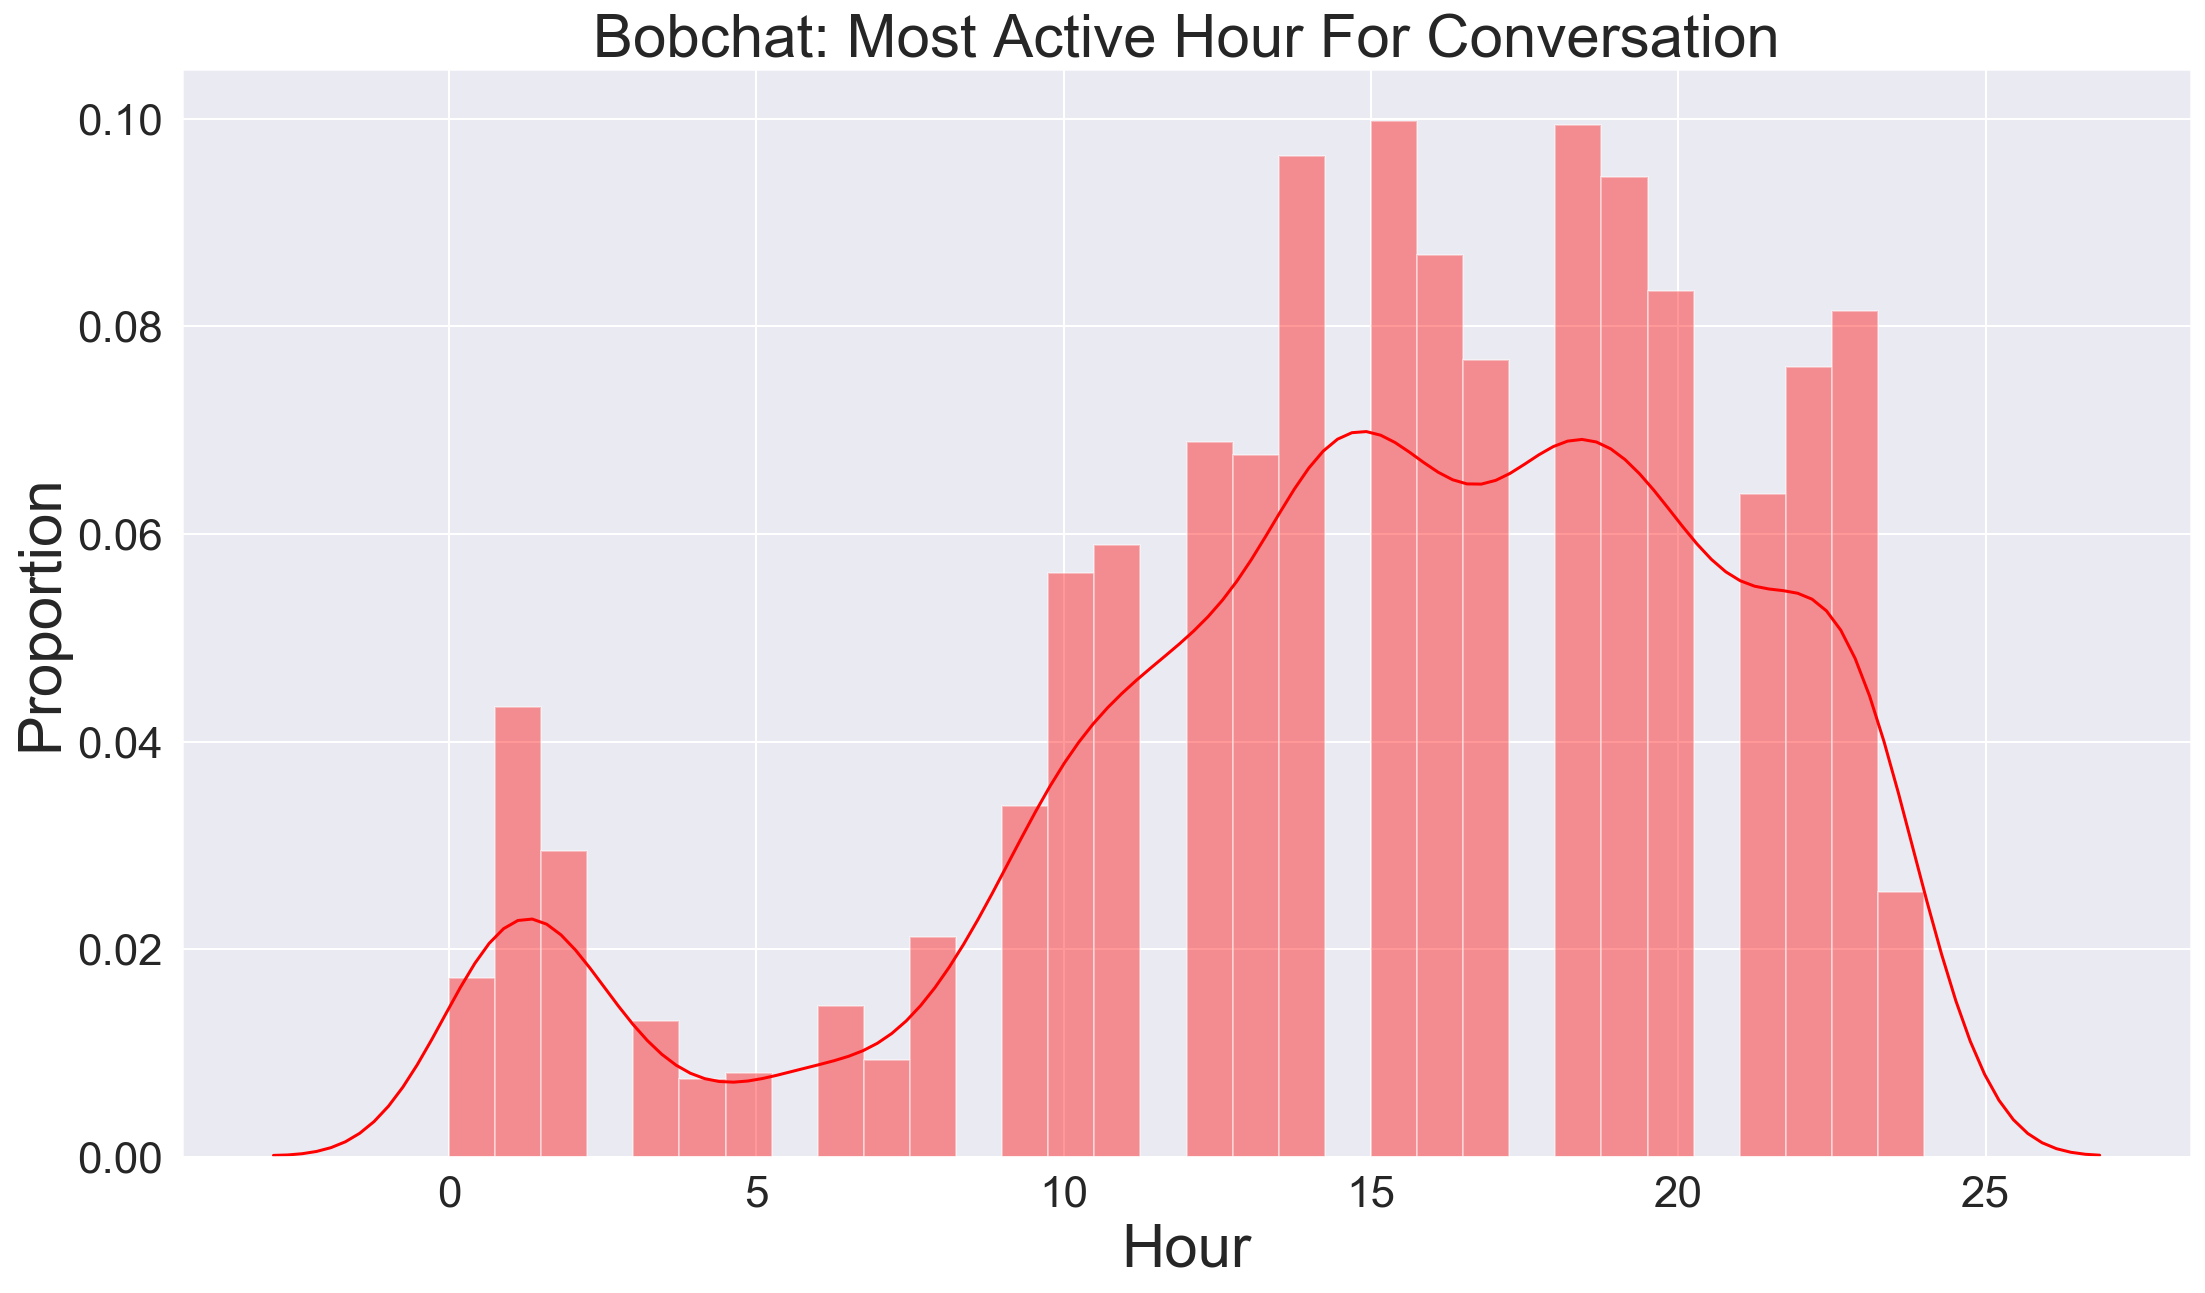

''

In [24]:
series_hour = data['hour'].sort_values()
sns.distplot(series_hour, hist=True, color = "red")    
sns.set(rc={'figure.figsize':(15,10)})  
sns.set(font_scale = 2)
plt.xlabel('Hour', fontsize=30)
plt.ylabel('Proportion', fontsize=30)
plt.title("Bobchat: Most Active Hour For Conversation", fontsize=30)
plt.show()
;

In [25]:
data.head()

,Timestamp,Message,Message Type,Response,Response Type,Response Group,Response Accuracy,Accuracy Diagnosis,Fixed or Improved,Negative Sentiment,Notes,word_count,day_of_week,hour
0,2019-02-12 11:19:00,im lonely,Freeform,Sometimes that happens. We can chat a bit if t...,Small Talk,Small Talk,Full,NaN,False,True,NaN,2,Tuesday,11.0
1,2019-02-12 12:13:00,kill,Freeform,If you or another are in a life- or limb-threa...,Emergency,Emergency,Full,NaN,False,True,Reached out to this user to confirm this was t...,1,Tuesday,12.0
2,2019-02-12 12:14:00,self development,Button,For questions about self-development:,Development Menu,Development,Full,NaN,False,False,NaN,3,Tuesday,12.0
3,2019-02-12 12:14:00,,Freeform,Yikes! I couldn't find that. Want me to connec...,Fallback,Fallback,None,No content,False,False,Do you know Japanese? according to Google Tran...,1,Tuesday,12.0
4,2019-02-12 12:29:00,bus,Freeform,Route A offers transportation between Washingt...,Bus A,Public Safety,Full,NaN,False,False,NaN,1,Tuesday,12.0


In [26]:
#message_hour_group = data[["Message", "hour"]].groupby("hour")
#message_hour_group.str.split(expand = True).stack().value_counts().split(expand = True).stack().value_counts()

### What is the most active date for a conversation?

In [27]:
data["Date"]= [d.date() for d in data["Timestamp"]]
data.head()

,Timestamp,Message,Message Type,Response,Response Type,Response Group,Response Accuracy,Accuracy Diagnosis,Fixed or Improved,Negative Sentiment,Notes,word_count,day_of_week,hour,Date
0,2019-02-12 11:19:00,im lonely,Freeform,Sometimes that happens. We can chat a bit if t...,Small Talk,Small Talk,Full,NaN,False,True,NaN,2,Tuesday,11.0,2019-02-12
1,2019-02-12 12:13:00,kill,Freeform,If you or another are in a life- or limb-threa...,Emergency,Emergency,Full,NaN,False,True,Reached out to this user to confirm this was t...,1,Tuesday,12.0,2019-02-12
2,2019-02-12 12:14:00,self development,Button,For questions about self-development:,Development Menu,Development,Full,NaN,False,False,NaN,3,Tuesday,12.0,2019-02-12
3,2019-02-12 12:14:00,,Freeform,Yikes! I couldn't find that. Want me to connec...,Fallback,Fallback,None,No content,False,False,Do you know Japanese? according to Google Tran...,1,Tuesday,12.0,2019-02-12
4,2019-02-12 12:29:00,bus,Freeform,Route A offers transportation between Washingt...,Bus A,Public Safety,Full,NaN,False,False,NaN,1,Tuesday,12.0,2019-02-12


In [28]:
date_message_count = data[["Message", "Date"]].groupby("Date").count()
date_message_count.reset_index(inplace=True)
date_message_count = date_message_count[(date_message_count["Date"] <= datetime.date(2019,3,30)) & (date_message_count["Date"] >= datetime.date(2018,12,1))]
date_message_count["Date"].min()

datetime.date(2019, 2, 12)

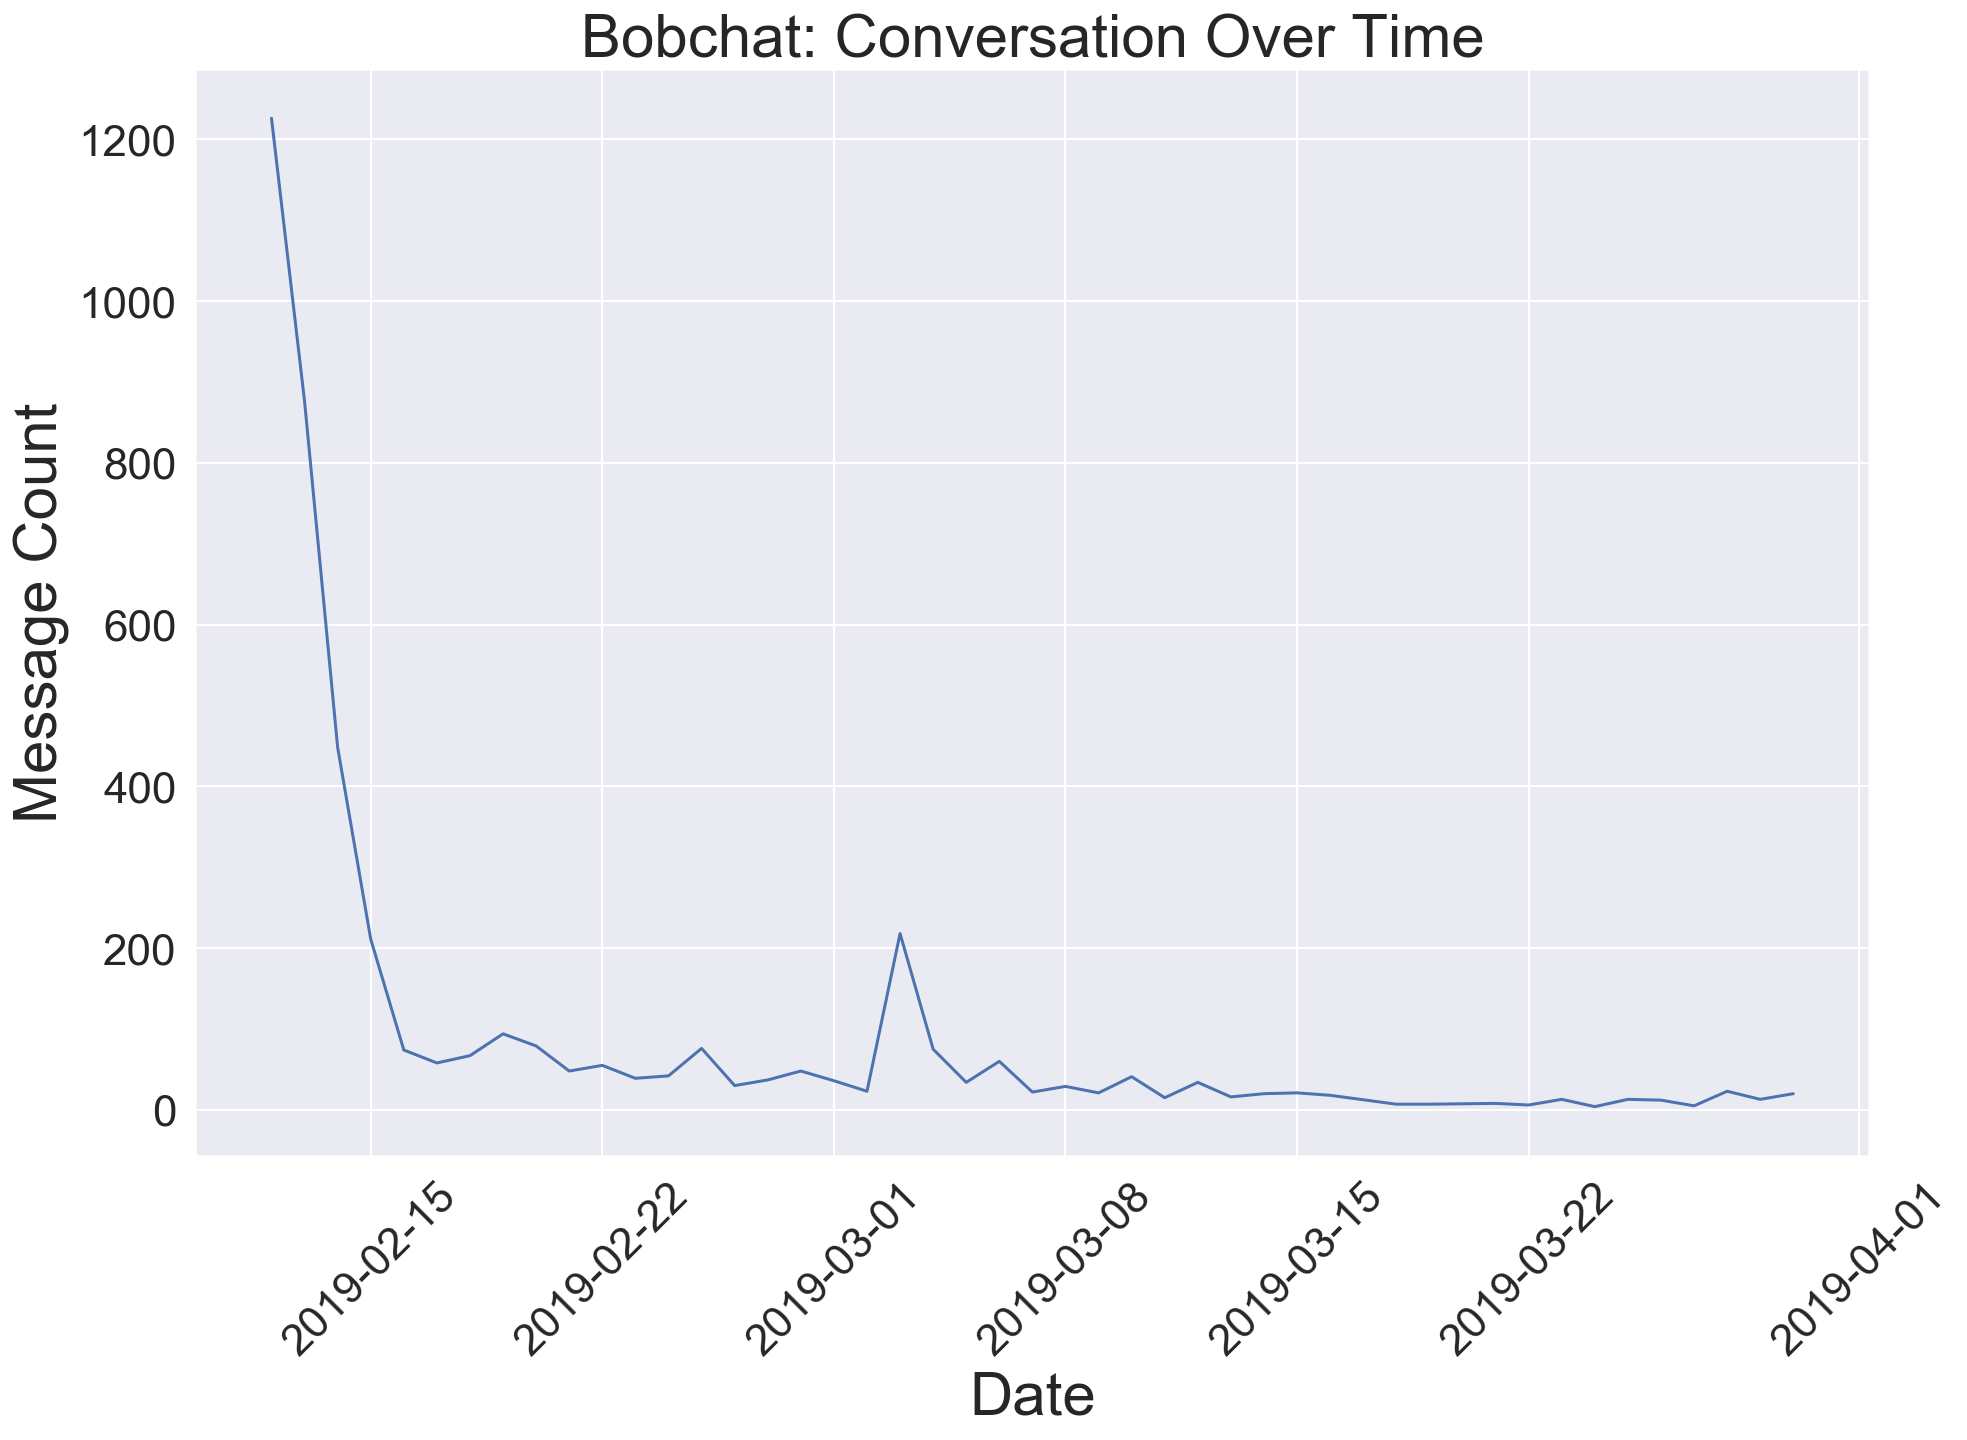

''

In [29]:

sns.lineplot(date_message_count["Date"], date_message_count["Message"] ) 
#sns.plot(date_message_count["Date"], date_message_count["Message"], kind ="bar")

sns.set(font_scale = 2)
plt.xlabel('Date', fontsize=30)
plt.xticks(rotation=45)
plt.ylabel('Message Count', fontsize=30)
plt.title("Bobchat: Conversation Over Time", fontsize=30)
plt.show()
;

### What is the most active day of the week for conversations?

In [30]:
series_day = data.groupby(["day_of_week"]).count()
series_day

,Timestamp,Message,Message Type,Response,Response Type,Response Group,Response Accuracy,Accuracy Diagnosis,Fixed or Improved,Negative Sentiment,Notes,word_count,hour,Date
day_of_week,,,,,,,,,,,,,,
Friday,722,722,722,722,722,722,722,184,722,722,51,722,722,722
Monday,590,590,590,590,590,590,590,149,590,590,74,590,590,590
Saturday,484,484,484,484,484,484,484,113,484,484,28,484,484,484
Sunday,592,592,592,592,592,592,592,187,592,592,49,592,592,592
Thursday,892,892,892,892,892,892,892,268,892,892,80,892,892,892
Tuesday,1813,1813,1813,1813,1813,1813,1813,528,1813,1813,187,1813,1813,1813
Wednesday,1334,1334,1334,1334,1334,1334,1334,412,1334,1334,167,1334,1334,1334


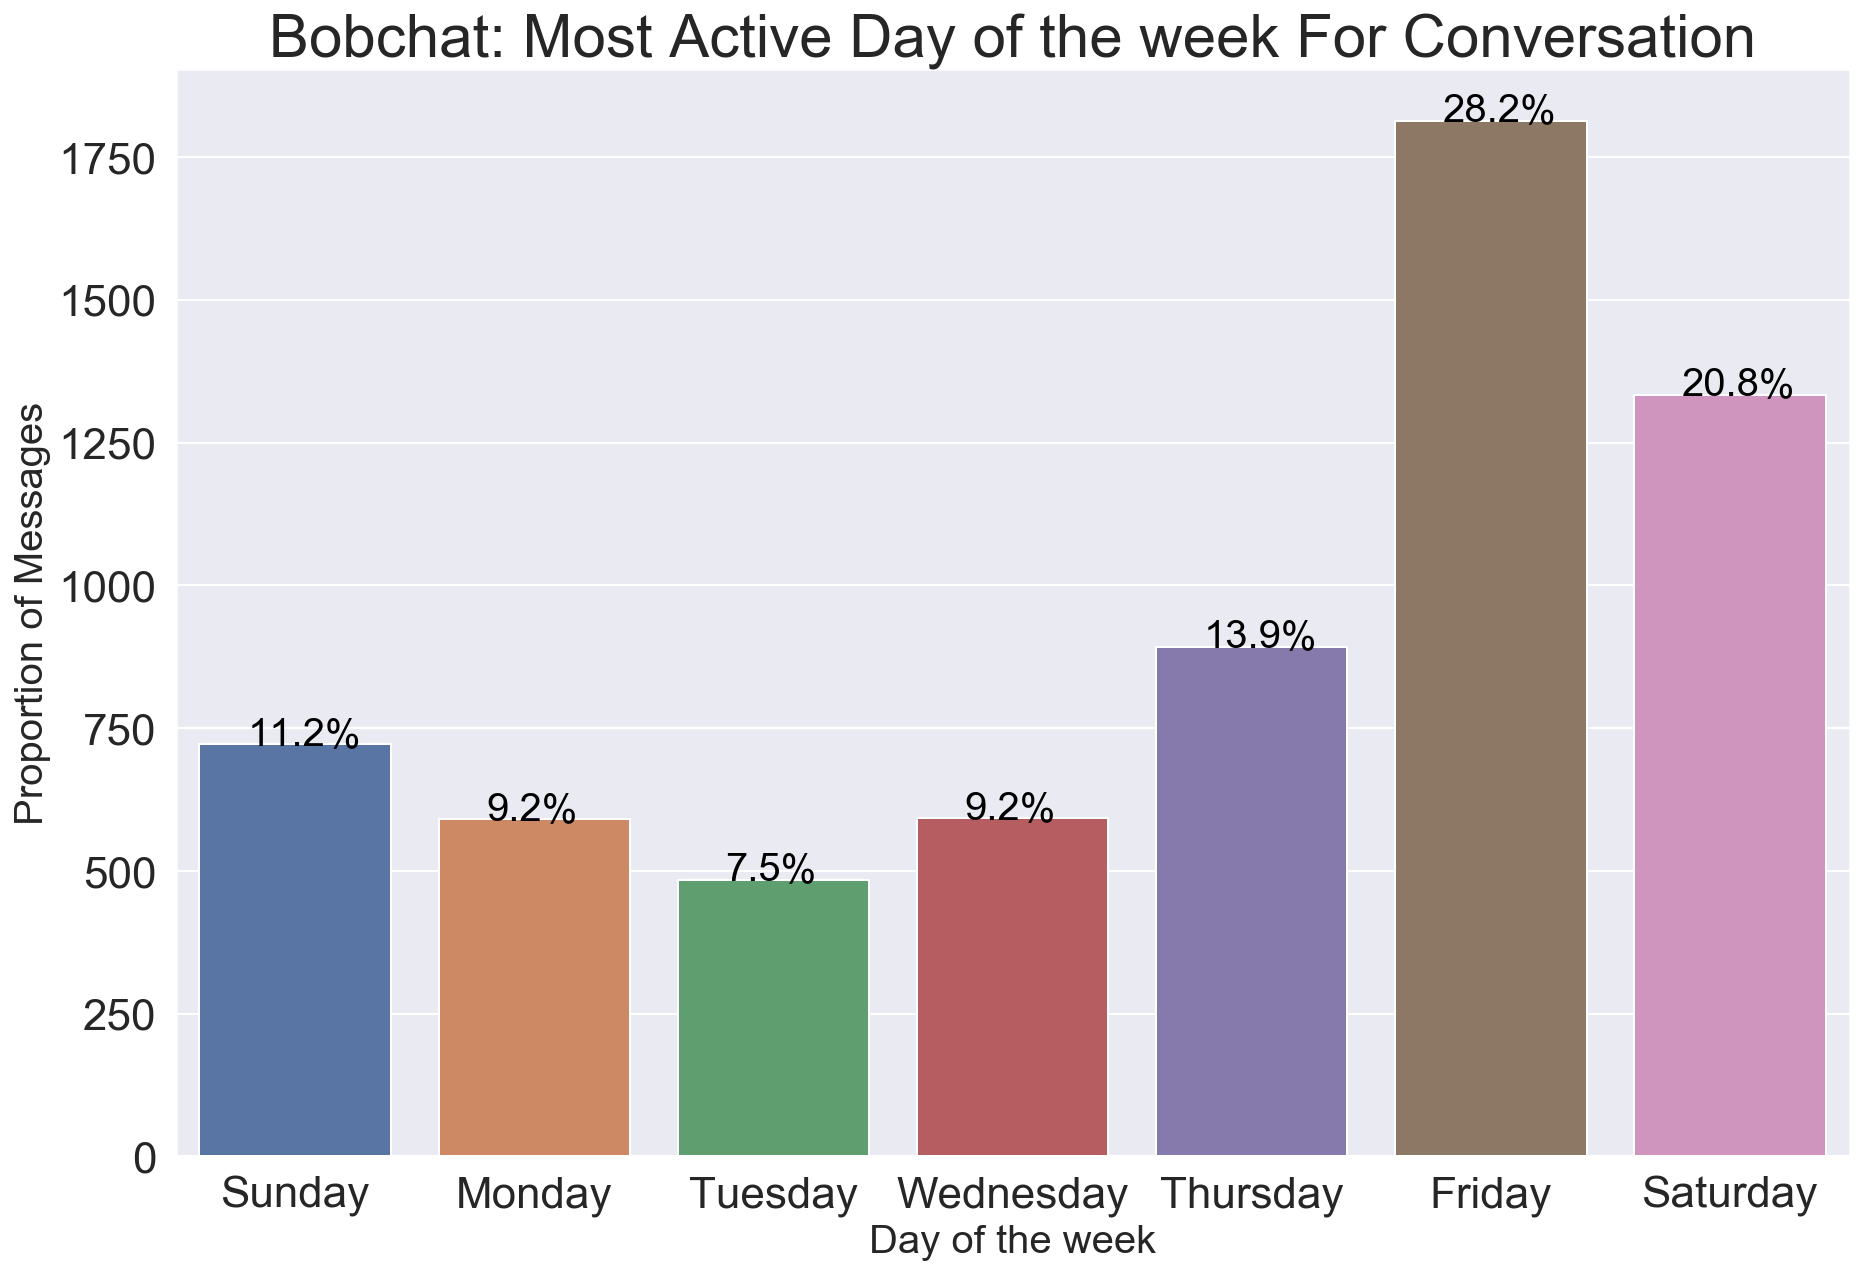

In [31]:
x = ['Sunday','Monday','Tuesday','Wednesday', 'Thursday', 'Friday','Saturday']
ax = sns.barplot(x, series_day['Message'])
sns.set(rc={'figure.figsize':(15,10)})  
sns.set(font_scale = 2)

plt.xlabel('Day of the week', fontsize = 20)
plt.ylabel('Proportion of Messages', fontsize = 20)
plt.title("Bobchat: Most Active Day of the week For Conversation", fontsize = 30)
#create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
    
#set individual bar lables using above list
total = sum(totals)

#set individual bar lables using above list
for i in ax.patches:
    #get_x pulls left or right ; get_height pushes up or down
    ax.text(i.get_x()+ .2, i.get_height()+.1, \
           str(round((i.get_height()/total)*100,1))+'%', fontsize=20, color = 'black')
plt.show()

## Sentiment Analysis of conversation using Vader

We will use the VADER (Valence Aware Dictionary and Sentiment Reasoner) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically useful for sentiments in social media. The VADER lexicon gives the sentiment of individual words. 

In [32]:
# Getting Vader Data Set
url = 'https://raw.githubusercontent.com/cjhutto/vaderSentiment/master/vaderSentiment/vader_lexicon.txt'

vader = pd.read_csv(url, sep = '\t', header = None )
#Renaming Columns
vader = vader.rename(columns = {1:'polarity', 0 : 'token', 2:'standard dev', 3: 'raw scores'})
#Indexing by Token
vader = vader.set_index('token')

vader.head()

,polarity,standard dev,raw scores
token,,,
$:,-1.5,0.80623,"[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]"
%),-0.4,1.01980,"[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]"
%-),-1.5,1.43178,"[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]"
&-:,-0.4,1.42829,"[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]"
&:,-0.7,0.64031,"[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]"


### Getting Data Ready for Polarity

In [33]:
# Creating an Id column
data['id'] = list(range(len(data)))

#Setting Index to Id
data = data.set_index('id')
data.head()

,Timestamp,Message,Message Type,Response,Response Type,Response Group,Response Accuracy,Accuracy Diagnosis,Fixed or Improved,Negative Sentiment,Notes,word_count,day_of_week,hour,Date
id,,,,,,,,,,,,,,,
0,2019-02-12 11:19:00,im lonely,Freeform,Sometimes that happens. We can chat a bit if t...,Small Talk,Small Talk,Full,NaN,False,True,NaN,2,Tuesday,11.0,2019-02-12
1,2019-02-12 12:13:00,kill,Freeform,If you or another are in a life- or limb-threa...,Emergency,Emergency,Full,NaN,False,True,Reached out to this user to confirm this was t...,1,Tuesday,12.0,2019-02-12
2,2019-02-12 12:14:00,self development,Button,For questions about self-development:,Development Menu,Development,Full,NaN,False,False,NaN,3,Tuesday,12.0,2019-02-12
3,2019-02-12 12:14:00,,Freeform,Yikes! I couldn't find that. Want me to connec...,Fallback,Fallback,None,No content,False,False,Do you know Japanese? according to Google Tran...,1,Tuesday,12.0,2019-02-12
4,2019-02-12 12:29:00,bus,Freeform,Route A offers transportation between Washingt...,Bus A,Public Safety,Full,NaN,False,False,NaN,1,Tuesday,12.0,2019-02-12


In [34]:
# Subset of data
# Splitting Messages and explanding them so each word is a column
message_split = data['Message'].str.split(expand = True) 
message_split.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
id,,,,,,,,,,,,,,,,,,,,,
0,im,lonely,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,kill,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,self,development,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,bus,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [35]:
# Inverting the Subset
numbered_columns = message_split.columns.values
# resetting index, removing it from id
message_split.reset_index(inplace = True)
# Creating Tidy format by merging the numbered columns with the Message split table
tidy_format = pd.melt(message_split, id_vars=['id'], value_vars=numbered_columns)
tidy_format.head()

,id,variable,value
0,0,0,im
1,1,0,kill
2,2,0,self
3,3,0,None
4,4,0,bus


In [36]:
# Renaming Columsn for join to match vader set
tidy_format = tidy_format.rename(columns = {'variable' : 'num', 'value' : 'word'})

tidy_format = tidy_format.dropna()

tidy_format = tidy_format.sort_values(['id', 'num'])

tidy_format.head()

,id,num,word
0,0,0,im
6427,0,1,lonely
1,1,0,kill
2,2,0,self
6429,2,1,development


In [37]:
# joining vader and Tidy Format
tidy_format_sent_merged = tidy_format.merge(vader, how = 'left', left_on = 'word', right_index = True)

tidy_format_sent_merged = tidy_format_sent_merged.loc[:, ['id','num', 'word', 'polarity']]

tidy_format_sent_merged = tidy_format_sent_merged.fillna(0)

tidy_format_sent_merged.head()

,id,num,word,polarity
0,0,0,im,0.0
6427,0,1,lonely,-1.5
1,1,0,kill,-3.7
2,2,0,self,0.0
6429,2,1,development,0.0


In [38]:
# Summing together the id of the message to get a sum of the polarity scores for each word
grouped_tidy_format_sent_merged = tidy_format_sent_merged.groupby('id').agg(sum)

grouped_tidy_format_sent_merged.head()


,num,polarity
id,,
0,1,-1.5
1,0,-3.7
2,1,0.0
4,0,0.0
5,1,0.0


In [39]:
# Adding a column called polarity to our Data Set 
# Merged on Id
# Polarity of the message
data['polarity'] = tidy_format_sent_merged.groupby('id').agg({'polarity':'sum'})
data.head()

,Timestamp,Message,Message Type,Response,Response Type,Response Group,Response Accuracy,Accuracy Diagnosis,Fixed or Improved,Negative Sentiment,Notes,word_count,day_of_week,hour,Date,polarity
id,,,,,,,,,,,,,,,,
0,2019-02-12 11:19:00,im lonely,Freeform,Sometimes that happens. We can chat a bit if t...,Small Talk,Small Talk,Full,NaN,False,True,NaN,2,Tuesday,11.0,2019-02-12,-1.5
1,2019-02-12 12:13:00,kill,Freeform,If you or another are in a life- or limb-threa...,Emergency,Emergency,Full,NaN,False,True,Reached out to this user to confirm this was t...,1,Tuesday,12.0,2019-02-12,-3.7
2,2019-02-12 12:14:00,self development,Button,For questions about self-development:,Development Menu,Development,Full,NaN,False,False,NaN,3,Tuesday,12.0,2019-02-12,0.0
3,2019-02-12 12:14:00,,Freeform,Yikes! I couldn't find that. Want me to connec...,Fallback,Fallback,None,No content,False,False,Do you know Japanese? according to Google Tran...,1,Tuesday,12.0,2019-02-12,NaN
4,2019-02-12 12:29:00,bus,Freeform,Route A offers transportation between Washingt...,Bus A,Public Safety,Full,NaN,False,False,NaN,1,Tuesday,12.0,2019-02-12,0.0


In [40]:
print('Most negative messages:')
for m in data.sort_values('polarity').head()['Message']:
    print('\n  ', m)

Most negative messages:

   i’ll kill i’m going kill

   nyu report suicide sexual assaults happen campus apartments

   nyu going address sexual assault problem campus anytime soon

   kill

   wanna kill


In [41]:
print('Most positive messages:')
for m in data.sort_values('polarity', ascending = False).head()['Message']:
    print('\n  ', m)

Most positive messages:

   please i'm planning come nyu finish current studies(i'm left one year still bachelor human resources development major psychology minor) question requirements need order get admitted nyu along getting scholarship please keep mind i'm honors student current university active strong gpa

   best place poop peace

   yes help make friends

   i’m strongly looking oncampus employment careernet applied everywhere got response kindly help find one

   alumni would like know request immunization records best way go registrar’s office


## What is the Average Polarity Score for our Data?

In [42]:
print(f'The average polarity score for our Conversations is {round(np.mean(data["polarity"]),4)}')
print(f'The standard error or varying scores of our polairty scores is {round(np.std(data["polarity"]),3)}')      

The average polarity score for our Conversations is 0.0738
The standard error or varying scores of our polairty scores is 0.691


This indicates that on average our conversavtions are more postive than negative, but we can not say that with much strength because our polarity scores vary across our sample of possible messages if we were to speak to everyone on campus.

/Users/Mackdig25/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Mackdig25/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Count')

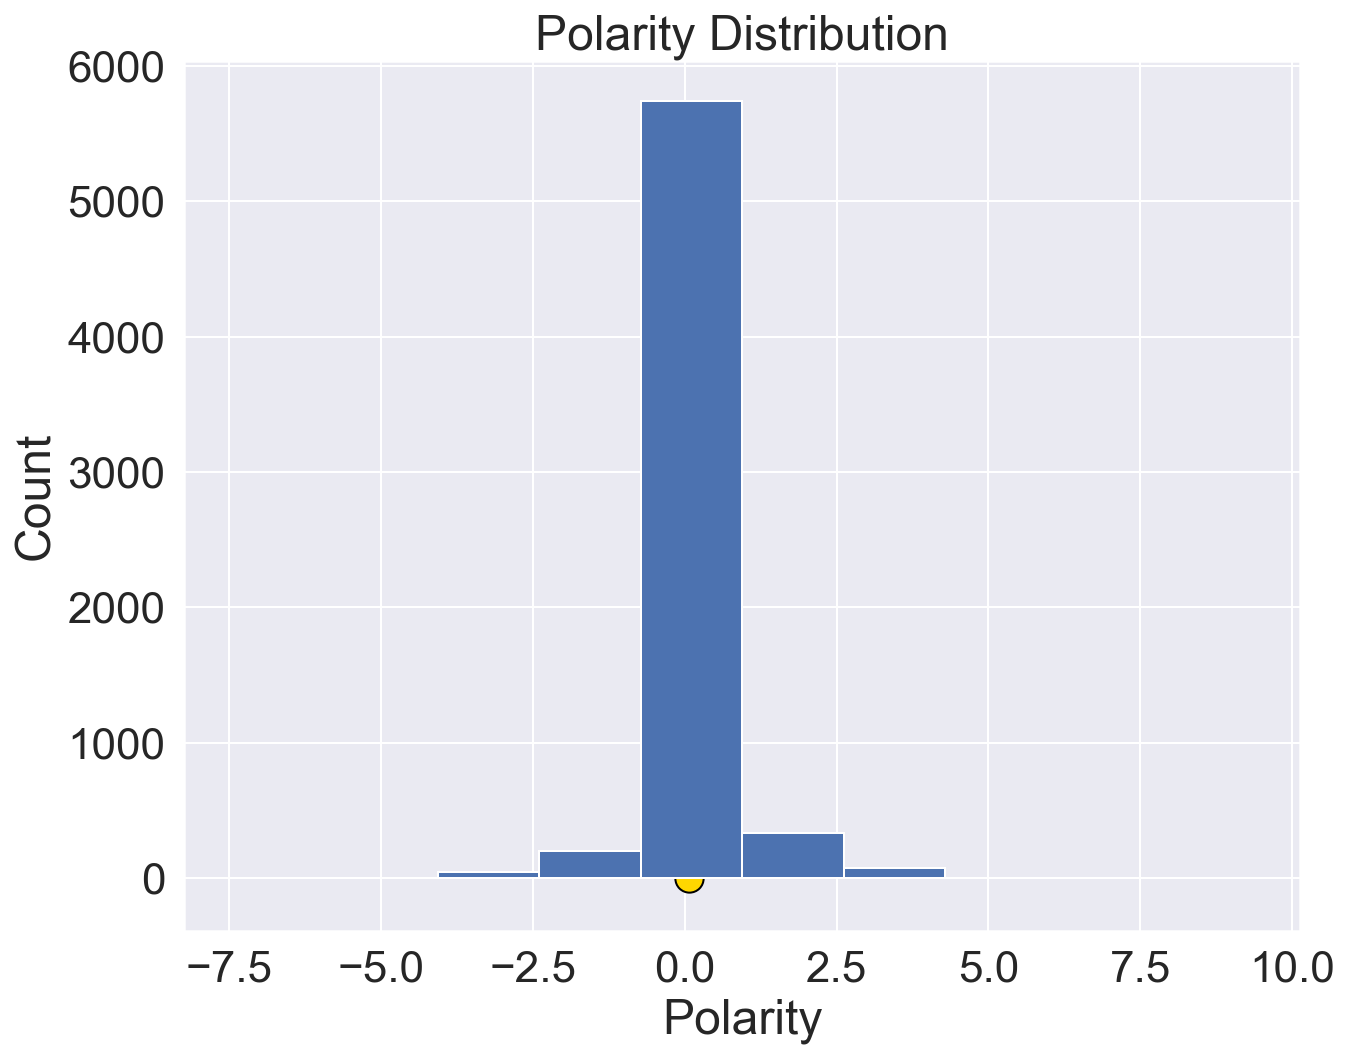

In [43]:
plt.figure(figsize=(10,8),edgecolor='blue')
plt.hist(data["polarity"], bins = 10)

#plot the mean and median of the heights
#median in red
#mean in gold
plt.scatter(np.mean(data['polarity']), 0, color='gold', s=200, edgecolors="black");
plt.title("Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Count")

### What would speaking to everyone on campus look like?

In [44]:
data[["polarity"]].head()

,polarity
id,
0,-1.5
1,-3.7
2,0.0
3,NaN
4,0.0


In [45]:
def bootstrap_mean(original_sample, label, replications):
    
    """Returns an list of bootstrapped sample means:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    
    just_one_column = original_sample[label]
    means = []
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resampled_mean = np.mean(bootstrap_sample)
        means = np.append(means, resampled_mean)
        
    return means

Text(0, 0.5, 'Count')

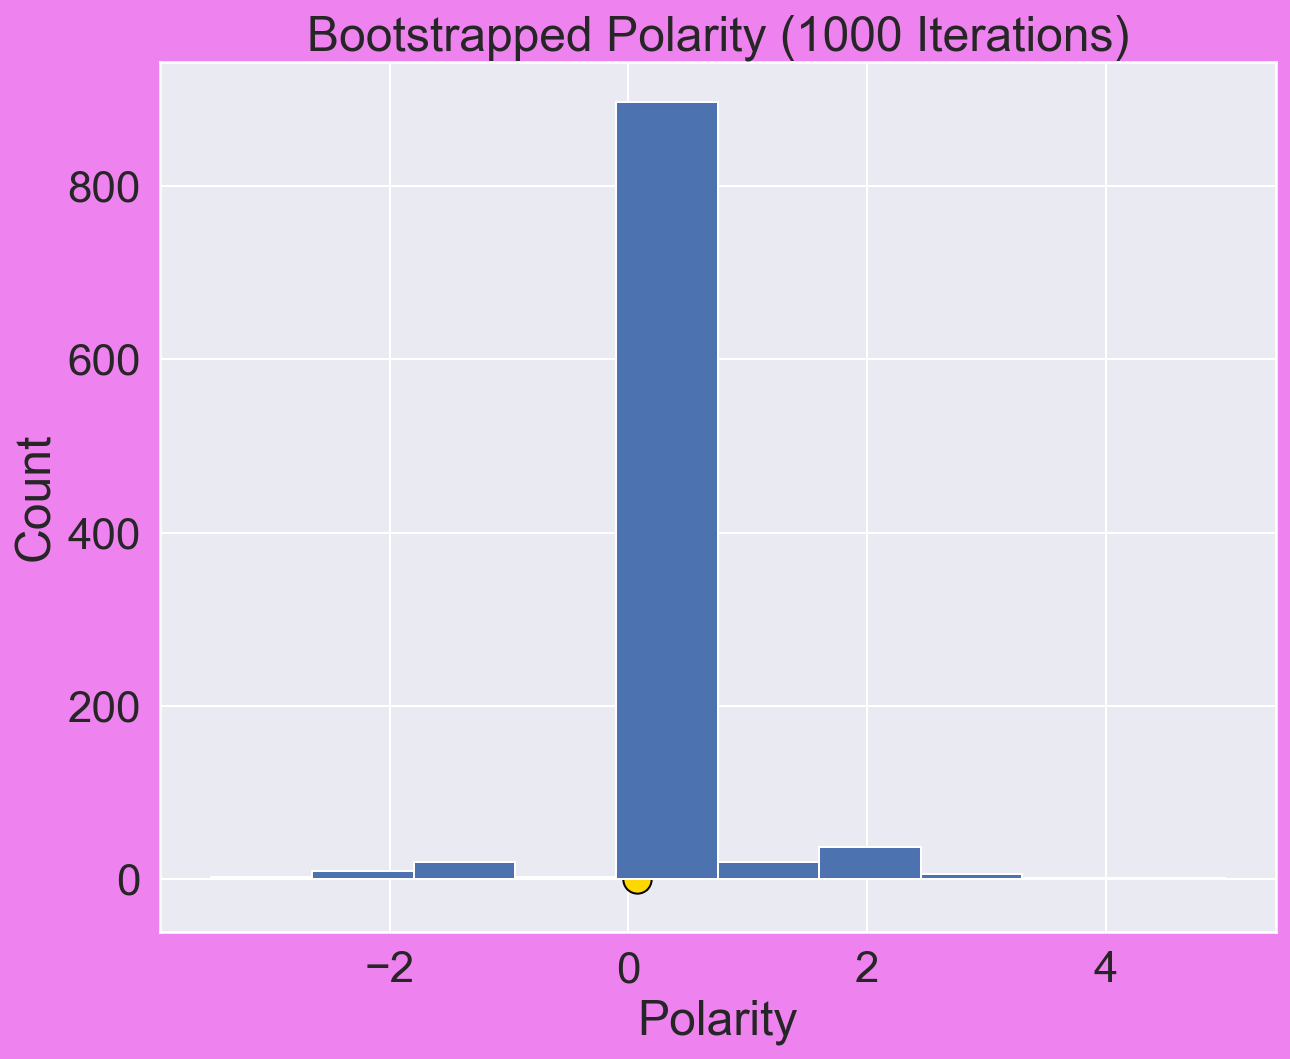

In [46]:
resampled_means = bootstrap_mean(data, "polarity", 1000)
plt.figure(figsize=(10,8),facecolor='violet',edgecolor='blue')
plt.hist(resampled_means, bins = 10)

#plot the mean and median of the heights
#median in red
#mean in gold
plt.scatter(np.mean(data['polarity']), 0, color='gold', s=200, edgecolors="black");
plt.title("Bootstrapped Polarity (1000 Iterations)")
plt.xlabel("Polarity")
plt.ylabel("Count")

###  Messages by Response Group

In [47]:
data["Response Group"].unique()

array(['Small Talk', 'Emergency', 'Development', 'Fallback',
       'Public Safety', 'Miscellaneous', 'Wasserman', 'Global Services',
       'Global Spiritual Life', 'Dining', 'Athletics', 'Libraries',
       'Feedback', 'Academics', 'Human', 'Campus', 'Housing', 'NYC',
       'Center for Student Life', 'ULC/ARC', 'NYU Traditions',
       'Admissions', 'Student Government', 'Redirects', 'Majors',
       'Special Sessions', 'Weather', 'Student Health Center',
       'Registrar', 'Study Away', 'Finances', 'Shanghai', 'Food & Drink',
       'StudentLink', 'Entrepreneurship', 'Seasonal', 'Schools', 'Alumni',
       'Abu Dhabi', 'Administration', 'LGBTQ+'], dtype=object)

In [48]:
Campus = data[data["Response Group"] == 'Campus']
print('Most positive Campus messages:')
for m in Campus.sort_values('polarity', ascending = False).head()['Message']:
    print('\n  ', m)

Most positive Campus messages:

   please i'm planning come nyu finish current studies(i'm left one year still bachelor human resources development major psychology minor) question requirements need order get admitted nyu along getting scholarship please keep mind i'm honors student current university active strong gpa

   best place nap

   best nap spots

   best nap spots

   best place study


In [49]:
print('Most negative Campus messages:')
for m in Campus.sort_values('polarity').head()['Message']:
    print('\n  ', m)

Most negative Campus messages:

   i’m failing college

   i'm failing classes

   printer palladium always broken

   i’m lost brooklyn campus

   i’m lost bobst


In [50]:
Dining = data[data["Response Group"] == 'Dining']
print('Most positive Dining messages:')
for m in Dining.sort_values('polarity', ascending = False).head()['Message']:
    print('\n  ', m)

Most positive Dining messages:

   best dining hall

   best dining hall

   what's best dining hall

   dining hall best

   urgent care close


In [51]:
print('Most negative Dining messages:')
for m in Dining.sort_values('polarity').head()['Message']:
    print('\n  ', m)

Most negative Dining messages:

   depression

   depression

   think depression

   think depression

   food insecurity


In [52]:
Libraries = data[data["Response Group"] == 'Libraries']
print('Most positive Libraries messages:')
for m in Libraries.sort_values('polarity', ascending = False).head()['Message']:
    print('\n  ', m)

Most positive Libraries messages:

   yes please

   yes please

   yes please

   yes please

   yes please


In [53]:
print('Most negative Libraries messages:')
for m in Libraries.sort_values('polarity').head()['Message']:
    print('\n  ', m)

Most negative Libraries messages:

   bobst wifi suck

   time bobst closed today

   bobst closed today

   open

   dibner library


In [54]:
Global_Services = data[data["Response Group"] == 'Global Services']
print('Most positive Global Services messages:')
for m in Global_Services.sort_values('polarity', ascending = False).head()['Message']:
    print('\n  ', m)

Most positive Global Services messages:

   security help

   share social security number

   need security

   important dates freshman

   important info


In [55]:
print('Most negative Global Services messages:')
for m in Global_Services.sort_values('polarity').head()['Message']:
    print('\n  ', m)

Most negative Global Services messages:

   opt workshop

   postgrad info

   need visa i20 qualified applying dormitory

    global services

    global services


#### These don't seem to be that helpful. I am seeing the faults in the Vader polarity grading system. 

## Freeform vs. Button

In [56]:
message_type_count = data.groupby(["Message Type"]).count()
message_type_count

,Timestamp,Message,Response,Response Type,Response Group,Response Accuracy,Accuracy Diagnosis,Fixed or Improved,Negative Sentiment,Notes,word_count,day_of_week,hour,Date,polarity
Message Type,,,,,,,,,,,,,,,
Button,2963,2963,2963,2963,2963,2963,26,2963,2963,53,2963,2963,2963,2963,2957
Freeform,3464,3464,3464,3464,3464,3464,1815,3464,3464,583,3464,3464,3464,3464,3448


#### Removing Unsure outliers

In [57]:
data.drop(data.loc[data["Message Type"] == "Unsure"].index, inplace = True)
message_type_count = data.groupby(["Message Type"]).count()
message_type_count

,Timestamp,Message,Response,Response Type,Response Group,Response Accuracy,Accuracy Diagnosis,Fixed or Improved,Negative Sentiment,Notes,word_count,day_of_week,hour,Date,polarity
Message Type,,,,,,,,,,,,,,,
Button,2963,2963,2963,2963,2963,2963,26,2963,2963,53,2963,2963,2963,2963,2957
Freeform,3464,3464,3464,3464,3464,3464,1815,3464,3464,583,3464,3464,3464,3464,3448


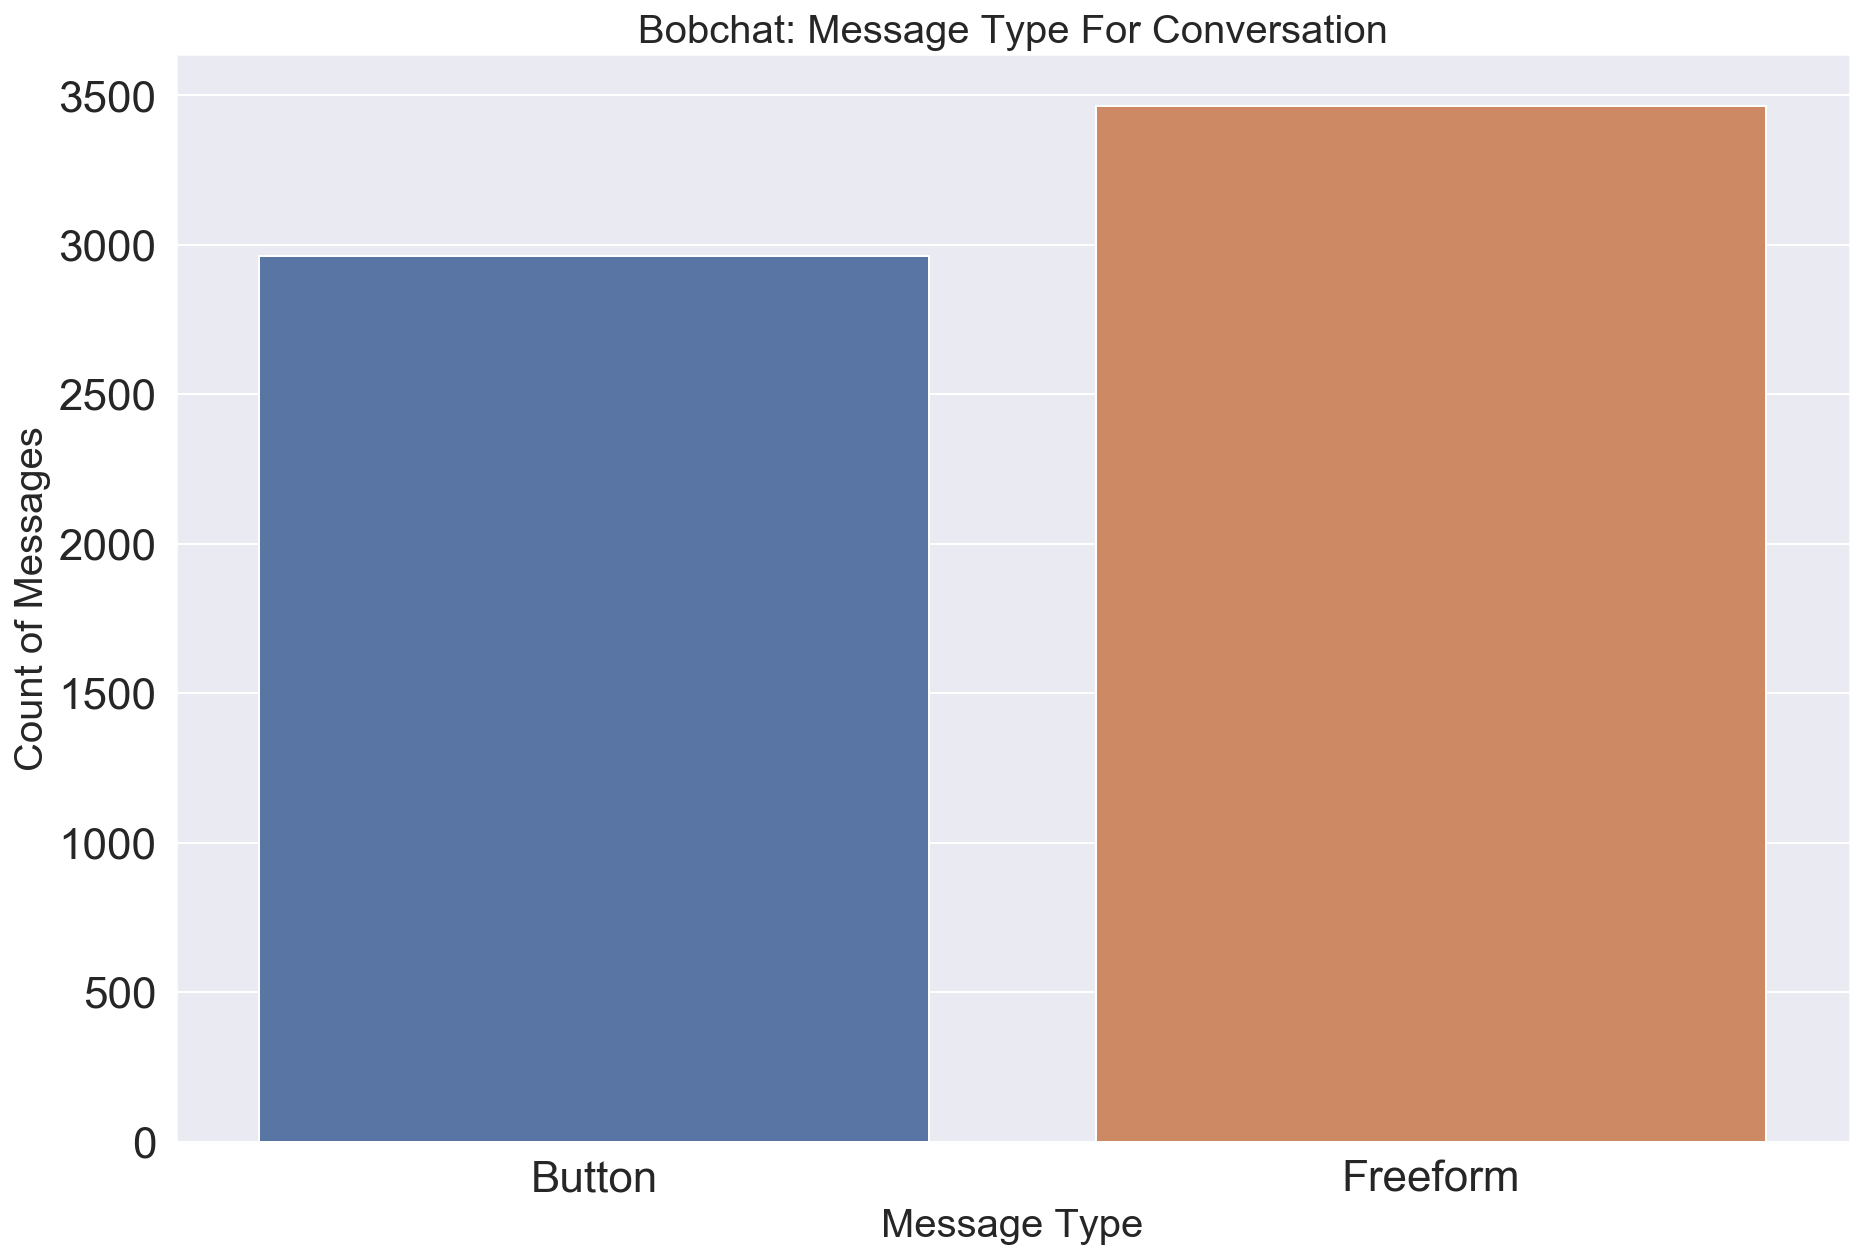

In [58]:
x = ["Button", "Freeform"]
y = message_type_count['Message']
sns.barplot(x, y)    
sns.set(rc={'figure.figsize':(8,5)})
sns.set(font_scale = 2)
plt.xlabel('Message Type', fontsize = 20)
plt.ylabel('Count of Messages', fontsize=20)
plt.title("Bobchat: Message Type For Conversation", fontsize = 20)
plt.show()

In [59]:
data["Response Accuracy"].unique()

array(['Full', 'None', 'Partial'], dtype=object)

In [60]:
series = data.groupby(["Message Type","Response Accuracy"]).count()

In [61]:
pivot_MessageType_Accuracy_count = pd.pivot_table(
    data, index='Message Type', columns="Response Accuracy", values= 'Message', aggfunc= len)
pivot_MessageType_Accuracy_count

Response Accuracy,Full,None,Partial
Message Type,,,
Button,2937,21,5
Freeform,1649,1366,449


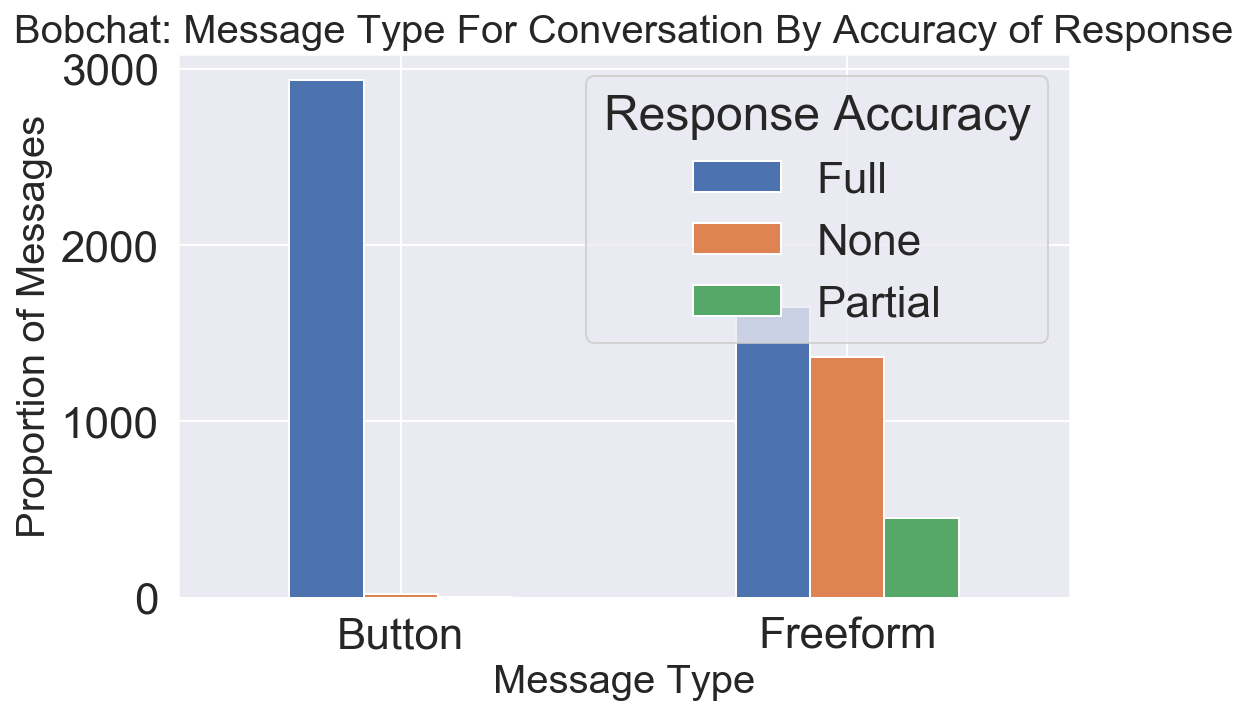

In [62]:
pd.crosstab(data['Message Type'],data['Response Accuracy']).plot.bar()
sns.set(rc={'figure.figsize':(15,8)})
sns.set(font_scale = 2)
plt.xlabel('Message Type', fontsize = 20 )
plt.xticks(rotation=0)
plt.ylabel('Proportion of Messages', fontsize= 20)
plt.title("Bobchat: Message Type For Conversation By Accuracy of Response", fontsize = 20)
plt.show()

### Freeform accuracy rate

In [63]:
freeform_data = data[data["Message Type"] == "Freeform"]
none = (freeform_data[freeform_data["Response Accuracy"] == 'None'].count()/ len(freeform_data) ) * 100
partial = (freeform_data[freeform_data["Response Accuracy"] == 'Partial'].count()/ len(freeform_data) ) * 100
full = (freeform_data[freeform_data["Response Accuracy"] == 'Full'].count()/ len(freeform_data) ) * 100
print("Freeform Accuracy Percentage \nNone:",
      int(none["Message"]), "\nPartial:",
      int(partial["Message"]), "\nFull:",
      int(full["Message"]))

Freeform Accuracy Percentage 
None: 39 
Partial: 12 
Full: 47


Text(0.5, 1.0, 'Bobchat Upgrade Assesment on Previous Innaccurate Messages')

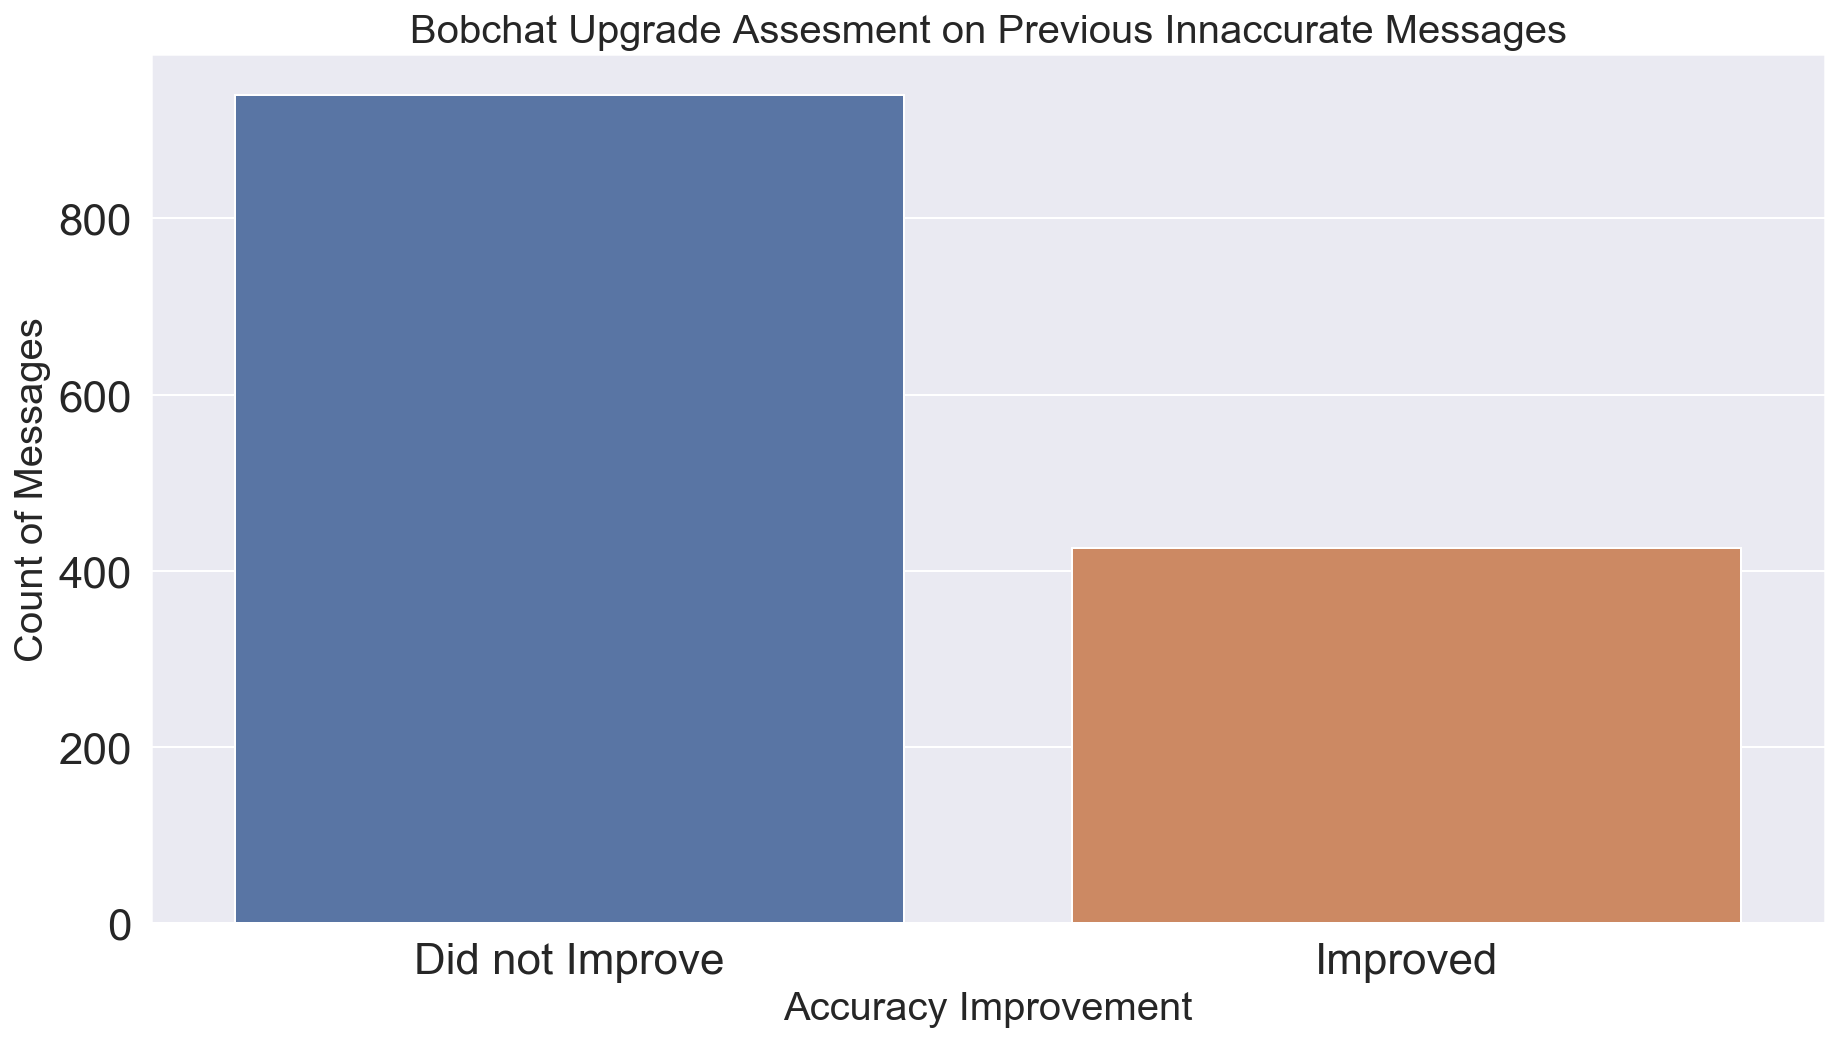

In [64]:
new = freeform_data[(freeform_data["Response Accuracy"] == "None") ]
improved = new[["Fixed or Improved","Message"]].groupby("Fixed or Improved").count()
x = ["Did not Improve", "Improved"]
sns.barplot(x, improved["Message"])
sns.set(rc={'figure.figsize':(8,5)})
sns.set(font_scale = 2)
plt.xlabel('Accuracy Improvement', fontsize = 20)
plt.ylabel('Count of Messages', fontsize=20)
plt.title("Bobchat Upgrade Assesment on Previous Innaccurate Messages", fontsize = 20)

## Respone Group

In [65]:
data["Response Group"].unique()

array(['Small Talk', 'Emergency', 'Development', 'Fallback',
       'Public Safety', 'Miscellaneous', 'Wasserman', 'Global Services',
       'Global Spiritual Life', 'Dining', 'Athletics', 'Libraries',
       'Feedback', 'Academics', 'Human', 'Campus', 'Housing', 'NYC',
       'Center for Student Life', 'ULC/ARC', 'NYU Traditions',
       'Admissions', 'Student Government', 'Redirects', 'Majors',
       'Special Sessions', 'Weather', 'Student Health Center',
       'Registrar', 'Study Away', 'Finances', 'Shanghai', 'Food & Drink',
       'StudentLink', 'Entrepreneurship', 'Seasonal', 'Schools', 'Alumni',
       'Abu Dhabi', 'Administration', 'LGBTQ+'], dtype=object)

In [66]:
Res_Group = data.groupby(["Response Group"]).count()
Res_Group.head()

,Timestamp,Message,Message Type,Response,Response Type,Response Accuracy,Accuracy Diagnosis,Fixed or Improved,Negative Sentiment,Notes,word_count,day_of_week,hour,Date,polarity
Response Group,,,,,,,,,,,,,,,
Abu Dhabi,33,33,33,33,33,33,7,33,33,2,33,33,33,33,33
Academics,295,295,295,295,295,295,86,295,295,31,295,295,295,295,295
Administration,85,85,85,85,85,85,24,85,85,1,85,85,85,85,85
Admissions,319,319,319,319,319,319,78,319,319,21,319,319,319,319,319
Alumni,16,16,16,16,16,16,1,16,16,0,16,16,16,16,16


### Top Five Response Group 

In [67]:
display = data[["Response Group", "Message"]]
display = display.groupby(["Response Group"]).count()
display.sort_values('Message', ascending = False)[:5]

,Message
Response Group,
Public Safety,924
Dining,659
Campus,465
Fallback,415
Housing,389


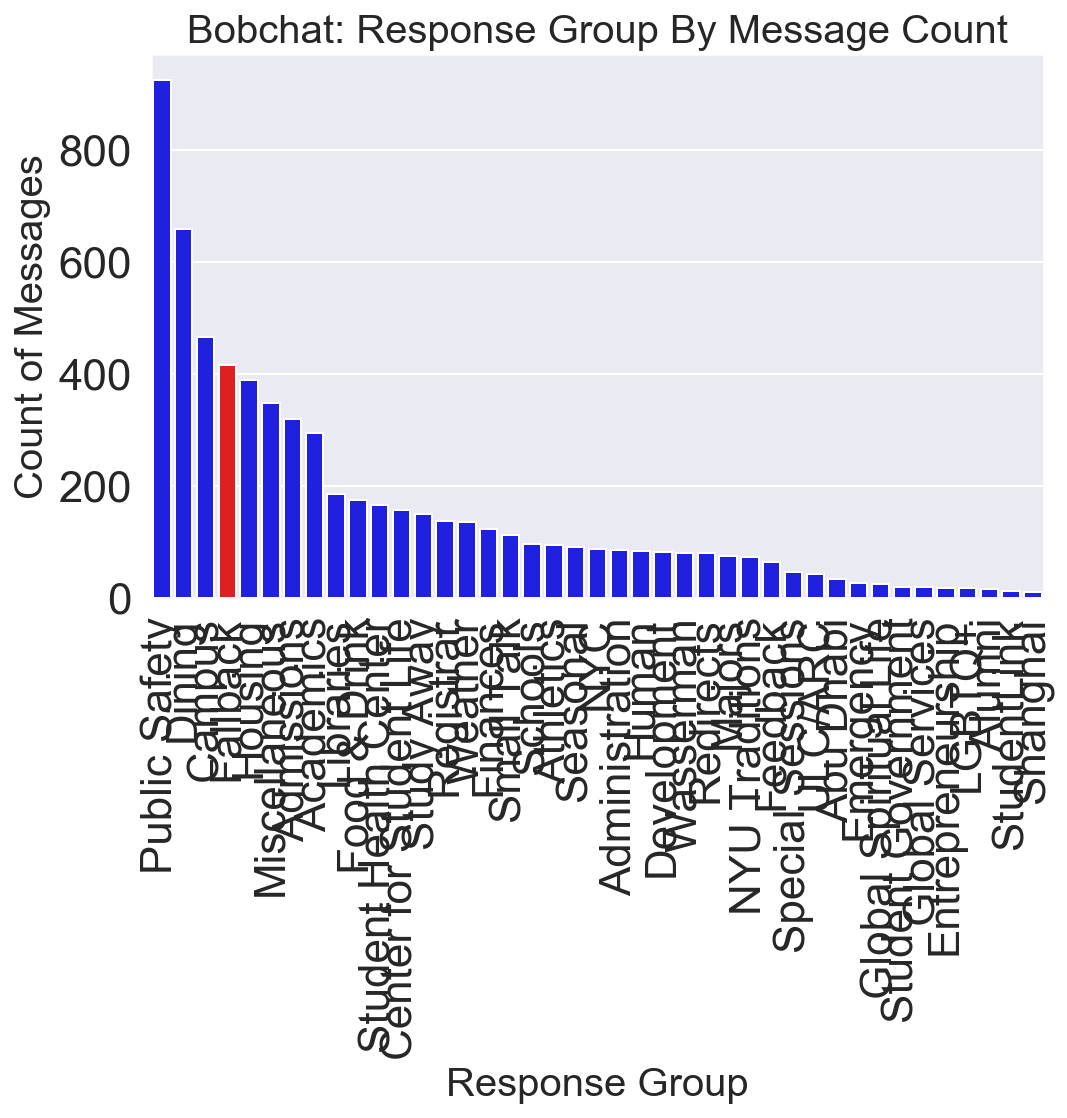

In [68]:
response_bar = display.sort_values('Message', ascending = False)
response_bar = response_bar.reset_index("Response Group")
clrs = ['red' if (x == "Fallback") else 'blue' for x in response_bar['Response Group'] ]
#sb.barplot(x=idx, y=values, palette=clrs) # color=clrs)
sns.barplot(x = response_bar["Response Group"], y = response_bar["Message"], palette = clrs)
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale = 2)
plt.xlabel('Response Group', fontsize = 20 )
plt.xticks(rotation=90)
plt.ylabel('Count of Messages', fontsize= 20)
plt.title("Bobchat: Response Group By Message Count", fontsize = 20)
plt.show()
#response_bar.head()

### Fallback Group
The fallback is a response type when the chatbot does not understand the question or cannot find a response to fit the question. It returns a standardized message asking the user if it would like to speak to a human.

In [69]:
# Subset the data to only messages of fallback
fallback = data[data["Response Group"] == "Fallback"]
print( f' There are {fallback.shape[0]} messages that received a Fallback Response')

 There are 415 messages that received a Fallback Response


#### Most common word

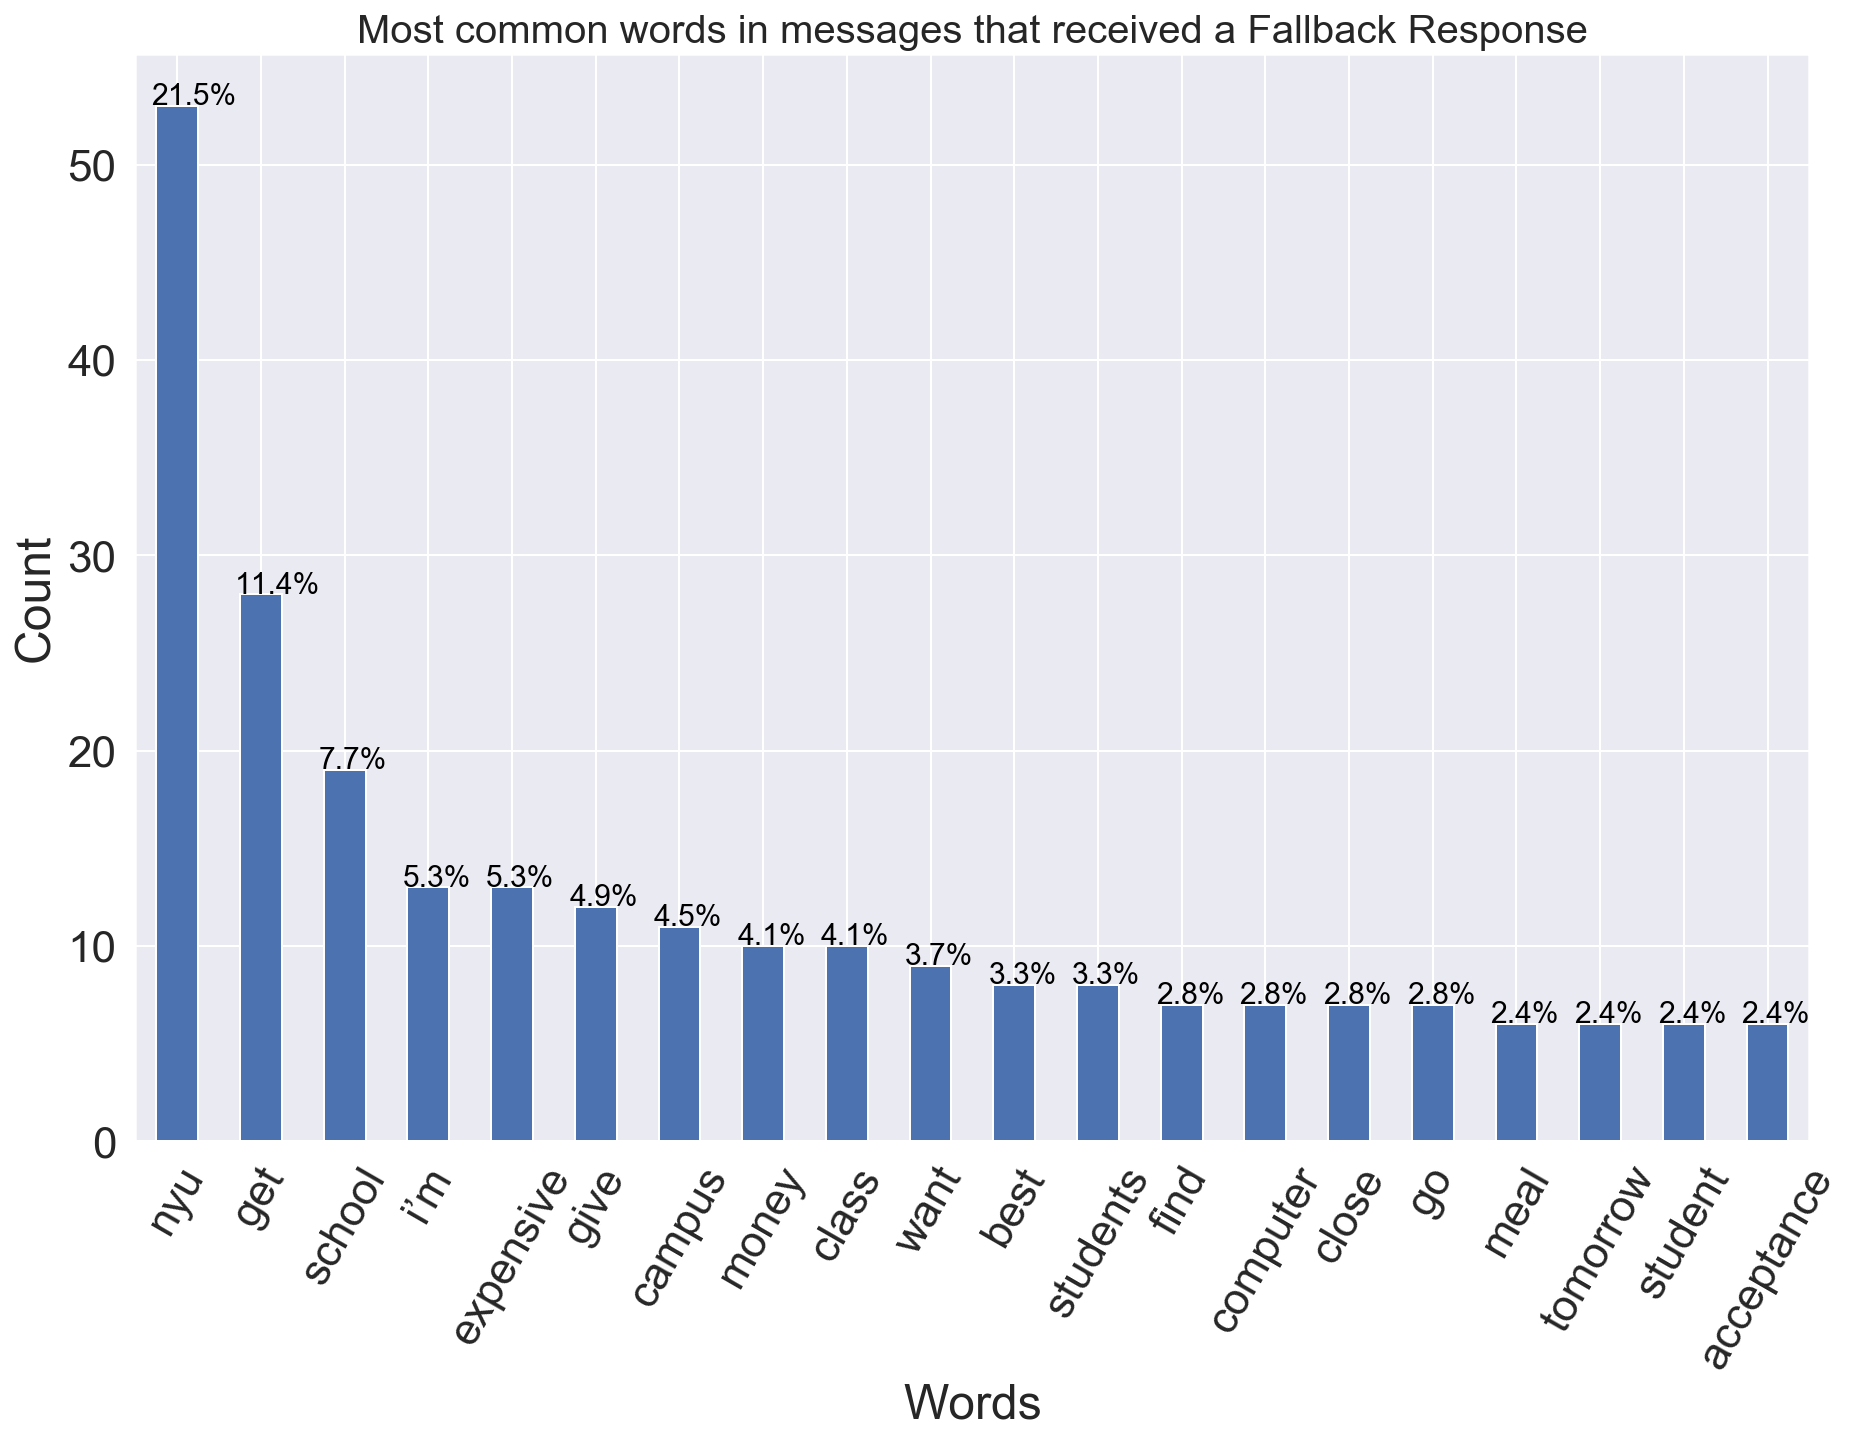

In [70]:
# Splitting the string type messages, then counting them
Fallback_top_words = fallback['Message'].str.split(expand = True).stack().value_counts()
Fallback_top_words_20 = Fallback_top_words[:20]

ax = Fallback_top_words_20.plot(kind ='bar', figsize = (15,10), rot = 60)

ax.set_alpha(.20)
ax.set_title("Most common words in messages that received a Fallback Response", fontsize = 20)
ax.set_ylabel("Count")
ax.set_xlabel("Words")


#create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
    
#set individual bar lables using above list
total = sum(totals)

#set individual bar lables using above list
for i in ax.patches:
    #get_x pulls left or right ; get_height pushes up or down
    ax.text(i.get_x()-.06, i.get_height()+.06, \
           str(round((i.get_height()/total)*100,1))+'%', fontsize=15, color = 'black')

In [71]:
print('Most negative Fallback messages:')
for m in fallback.sort_values('polarity').head()['Message']:
    print('\n  ', m)

Most negative Fallback messages:

   nyu racist

   nyu racist

   nyu setup campuses places serious human rights abuses

   avoid debt

   hate life


In [72]:
print('Most positive Fallback messages:')
for m in fallback.sort_values('polarity', ascending = False)['Message'][1:6]:
    print('\n  ', m)

Most positive Fallback messages:

   where's best place grab lunch

   best food campus

   what’s best place eat campus

   best bathroom

   best boba


### Top Five Negative Response Groups by Data Entry

In [73]:
# Data Entered Negative Sentiment
display2 = display = data[["Response Group", "Message", "Negative Sentiment"]]
display2 = display.groupby(["Response Group"]).agg(sum)
display2.sort_values('Negative Sentiment', ascending = False)[2:7]

,Negative Sentiment
Response Group,
Student Health Center,28.0
Finances,26.0
Emergency,22.0
Dining,19.0
Miscellaneous,18.0


### Top Five Negative Response Groups by Polarity

In [74]:
# Vader Sentiment
polarity_sort = data[["Response Group", "Message", "polarity"]]
polarity_sort= data.groupby(["Response Group"]).agg("mean")
polarity_sort.sort_values('polarity')[0:5]

,Fixed or Improved,Negative Sentiment,word_count,hour,polarity
Response Group,,,,,
Emergency,0.000000,0.846154,2.153846,14.923077,-2.230769
Weather,0.007407,0.088889,2.918519,17.081481,-0.207407
Student Government,0.050000,0.050000,2.050000,13.250000,-0.125000
Feedback,0.015625,0.093750,1.937500,15.218750,-0.065079
Registrar,0.072993,0.014599,2.547445,14.846715,-0.059848


### Most Postive Response Groups by polarity

In [75]:
polarity_sort.sort_values('polarity', ascending = False)[0:5]

,Fixed or Improved,Negative Sentiment,word_count,hour,polarity
Response Group,,,,,
Human,0.024096,0.000000,1.951807,15.891566,1.001205
Global Services,0.100000,0.100000,2.400000,12.250000,0.490000
Alumni,0.000000,0.000000,1.875000,16.750000,0.400000
Miscellaneous,0.048851,0.051724,2.597701,15.189655,0.247414
NYU Traditions,0.013699,0.013699,2.602740,13.739726,0.239726


## Response Type

In [76]:
data["Response Type"].unique()

array(['Small Talk', 'Emergency', 'Development Menu', 'Fallback', 'Bus A',
       'Get Involved Menu', 'Wasserman Drop-In Hours', '?SSN',
       'Public Safety Welcome', 'PS Contact', 'PS Victim Services',
       'PS Safety', 'Diversity Menu', 'Spiritual Life Menu',
       'GSL Welcome', '?Events', 'Dining Menus', 'Athletics Welcome',
       'Bobst Hours', 'Feedback Welcome', 'Feedback NYU',
       'Bobst Floor Plan', '?Academic Calendar', 'Cool Classes',
       'Live Chat', 'GCASL Address', 'Residence Halls',
       'Residence Halls Manhattan', 'Palladium Menu',
       'Area Prospect Park', 'Campus Menu', 'Bobst Welcome',
       'Service America Reads', 'ULC Welcome',
       'Explore NYU & NYC Welcome', 'NYU Traditions Welcome', 'Live Map',
       'Bus F', 'UA Contact', 'Palladium Floor Plan', '?Housing Cost',
       'Student Leadership Menu', 'Student Gov Menu',
       '?Application Status', 'Building Codes', 'Welcome Back',
       'IC Clubs', 'Agape Week', '?Internal Transfer', 'Adm

In [77]:
Res_Type = data[["Response Type", "Message", "Negative Sentiment", "polarity"]]
Res_Type.head()

,Response Type,Message,Negative Sentiment,polarity
id,,,,
0,Small Talk,im lonely,True,-1.5
1,Emergency,kill,True,-3.7
2,Development Menu,self development,False,0.0
3,Fallback,,False,NaN
4,Bus A,bus,False,0.0


In [78]:
Res_Type_group = Res_Type[["Response Type", "Message"]].groupby(["Response Type"]).count()
Res_Type_group.head()

,Message
Response Type,
18 Below Home,4
18 Below Hours,8
2 MetroTech Center Address,2
24 Hour Eateries,16
2nd St Address,5


### Top Five Most Common Message Type

In [79]:
Res_Type_group.sort_values('Message', ascending = False)[0:5]

,Message
Response Type,
Fallback,415
Bus B,161
Dining Menus,155
Bus IDK,140
Academics Menu,139


### Top Five Negative Sentiment Resource Types User Data Entry

In [80]:
Res_Type_group = Res_Type[["Response Type", "Negative Sentiment"]].groupby(["Response Type"]).sum()
Res_Type_group.sort_values('Negative Sentiment', ascending = False)[0:5]

,Negative Sentiment
Response Type,
Fallback,100.0
Small Talk,28.0
Emergency,22.0
?Mental Health Resources,15.0
Cost of Attendance,14.0


### Top Five Negative Sentiment Resource Type by Polarity

In [81]:
Res_Type_pol = Res_Type.groupby(["Response Type"]).agg("mean")
Res_Type_pol.sort_values('polarity')[0:5]

,Negative Sentiment,polarity
Response Type,,
Emergency,0.846154,-2.230769
Tutorial,1.000000,-2.100000
?Eligible,0.000000,-1.750000
?Free Flu Shots,0.000000,-1.600000
Rory Meyers College of Nursing Address,1.000000,-1.300000


### Top five Positive Sentiment Resource Type by Polarity

In [82]:
Res_Type_pol.sort_values('polarity', ascending = False)[0:5]

,Negative Sentiment,polarity
Response Type,,
Psychology Building Address,0.000000,3.100000
?SSN,0.666667,2.466667
?Cross School Classes,0.000000,2.300000
Alumni Address,0.000000,2.300000
Museum Guide,0.000000,2.300000


In [83]:
MessageType_ResponseType = pd.pivot_table(data, index='Response Type', columns='Message Type',
    values='Message', aggfunc=len)
MessageType_ResponseType = MessageType_ResponseType.fillna(0)
MessageType_ResponseType

Message Type,Button,Freeform
Response Type,,
18 Below Home,1.0,3.0
18 Below Hours,2.0,6.0
2 MetroTech Center Address,0.0,2.0
24 Hour Eateries,16.0,0.0
2nd St Address,1.0,4.0
2nd St Menu,1.0,0.0
3N Address,1.0,2.0
3N DO,1.0,0.0
3N Dining Address,0.0,1.0


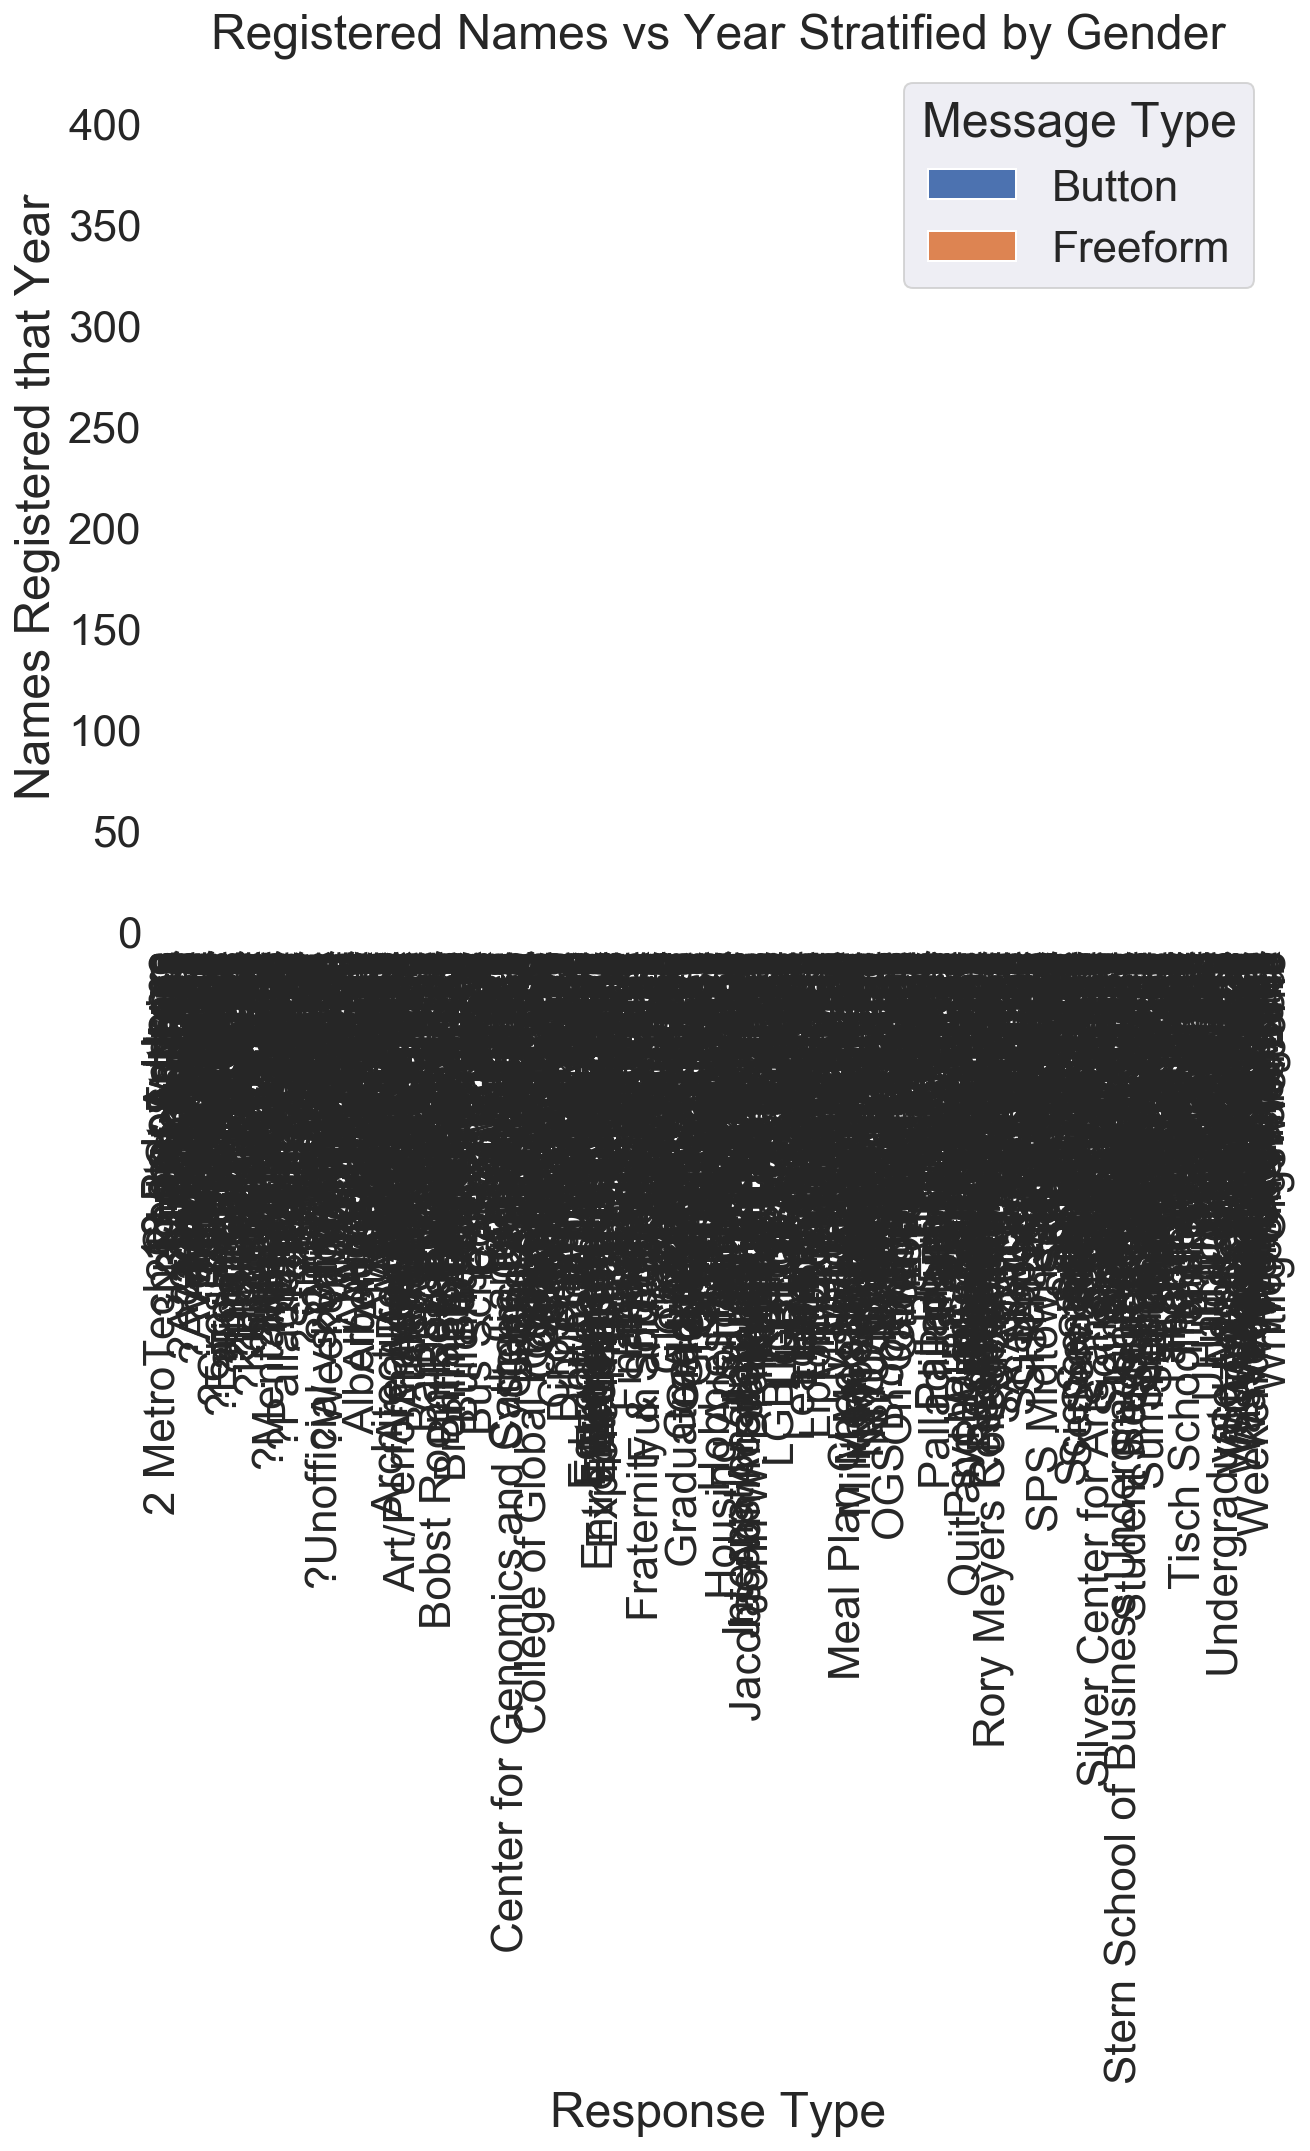

In [84]:
MessageType_ResponseType.plot(kind= 'bar', figsize = (10,8))
plt.title("Registered Names vs Year Stratified by Gender")
plt.gca().set_ylabel('Names Registered that Year');

## Coorleations

In [85]:
data.corr()

,Fixed or Improved,Negative Sentiment,word_count,hour,polarity
Fixed or Improved,1.000000,0.158900,0.085058,0.025404,0.029071
Negative Sentiment,0.158900,1.000000,0.087421,0.019046,-0.229825
word_count,0.085058,0.087421,1.000000,-0.009042,0.178284
hour,0.025404,0.019046,-0.009042,1.000000,0.013061
polarity,0.029071,-0.229825,0.178284,0.013061,1.000000


With data as it currently stands there does not appear to be any correlations, but we can adjust the data types

In [86]:
data.head()

,Timestamp,Message,Message Type,Response,Response Type,Response Group,Response Accuracy,Accuracy Diagnosis,Fixed or Improved,Negative Sentiment,Notes,word_count,day_of_week,hour,Date,polarity
id,,,,,,,,,,,,,,,,
0,2019-02-12 11:19:00,im lonely,Freeform,Sometimes that happens. We can chat a bit if t...,Small Talk,Small Talk,Full,NaN,False,True,NaN,2,Tuesday,11.0,2019-02-12,-1.5
1,2019-02-12 12:13:00,kill,Freeform,If you or another are in a life- or limb-threa...,Emergency,Emergency,Full,NaN,False,True,Reached out to this user to confirm this was t...,1,Tuesday,12.0,2019-02-12,-3.7
2,2019-02-12 12:14:00,self development,Button,For questions about self-development:,Development Menu,Development,Full,NaN,False,False,NaN,3,Tuesday,12.0,2019-02-12,0.0
3,2019-02-12 12:14:00,,Freeform,Yikes! I couldn't find that. Want me to connec...,Fallback,Fallback,None,No content,False,False,Do you know Japanese? according to Google Tran...,1,Tuesday,12.0,2019-02-12,NaN
4,2019-02-12 12:29:00,bus,Freeform,Route A offers transportation between Washingt...,Bus A,Public Safety,Full,NaN,False,False,NaN,1,Tuesday,12.0,2019-02-12,0.0


We need to change some of the values in the data set so that they are quantitative. pd.get_dummies creates 1 or 0 values for each unique category in a column. 

Below I have choosen to add Response Type, Response Group , Message Type, Negative Sentiment, Word Count, Hour and Day of the week to predict polarity. 

In [87]:
one_hot = pd.get_dummies(data[["Response Type",
                               "Response Group",
                               "Message Type",
                               "Negative Sentiment",
                               "word_count",
                               "polarity", 
                              "hour",
                              "day_of_week"]])
one_hot.dropna(inplace = True)
one_hot.head()

,Negative Sentiment,word_count,polarity,hour,Response Type_18 Below Home,Response Type_18 Below Hours,Response Type_2 MetroTech Center Address,Response Type_24 Hour Eateries,Response Type_2nd St Address,Response Type_2nd St Menu,...,Response Group_Weather,Message Type_Button,Message Type_Freeform,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
id,,,,,,,,,,,,,,,,,,,,,
0,True,2,-1.5,11.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,True,1,-3.7,12.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,False,3,0.0,12.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,False,1,0.0,12.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,False,3,0.0,13.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [88]:
correlation = one_hot.corr()
large_corr = correlation[abs(correlation["polarity"]) > .2]
large_corr

,Negative Sentiment,word_count,polarity,hour,Response Type_18 Below Home,Response Type_18 Below Hours,Response Type_2 MetroTech Center Address,Response Type_24 Hour Eateries,Response Type_2nd St Address,Response Type_2nd St Menu,...,Response Group_Weather,Message Type_Button,Message Type_Freeform,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
Negative Sentiment,1.000000,0.086824,-0.229825,0.019135,-0.005780,-0.008176,-0.004086,-0.011570,-0.006462,-0.002889,...,0.025505,-0.212681,0.212681,-0.032638,-0.044034,-0.044570,-0.034286,0.001517,0.046596,0.057337
polarity,-0.229825,0.178284,1.000000,0.013061,-0.002670,-0.003777,-0.001888,-0.005345,-0.002985,-0.001335,...,-0.059727,-0.040477,0.040477,-0.009058,-0.014203,0.008369,-0.021596,-0.008367,0.007130,0.026368
Response Type_?Making Friends,0.038698,0.014975,0.228642,0.019744,-0.001905,-0.002696,-0.001347,-0.003815,-0.002131,-0.000953,...,-0.011185,0.024457,-0.024457,-0.007528,-0.009999,-0.013999,-0.002908,0.005041,0.002651,0.016949
Response Type_Emergency,0.231381,-0.008156,-0.212976,-0.001233,-0.001596,-0.002258,-0.001128,-0.003195,-0.001784,-0.000798,...,-0.009368,-0.059122,0.059122,0.008411,-0.011819,-0.018253,-0.011845,0.023965,0.009155,-0.008402
Response Group_Emergency,0.231381,-0.008156,-0.212976,-0.001233,-0.001596,-0.002258,-0.001128,-0.003195,-0.001784,-0.000798,...,-0.009368,-0.059122,0.059122,0.008411,-0.011819,-0.018253,-0.011845,0.023965,0.009155,-0.008402


Nothing seems to be that highly correlated with polarity. We will move on none the less

## Predicting Sentiment 
### Without Message

In [89]:
# Create training and test sets

# Droping desired outcome polarity
X = one_hot.drop(columns=['polarity'])
Y = one_hot['polarity']

# Creating sets: Train 90 , Test 10
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10)

In [90]:
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

5764
641
5764
641


In [91]:
# Create model off of training set
model = LinearRegression().fit(X_train, Y_train)

In [92]:
# create predictors
Y_pred = model.predict(X_test)

# find residuals
residuals = Y_pred - Y_test

Text(0.5, 0, 'Observed Ys')

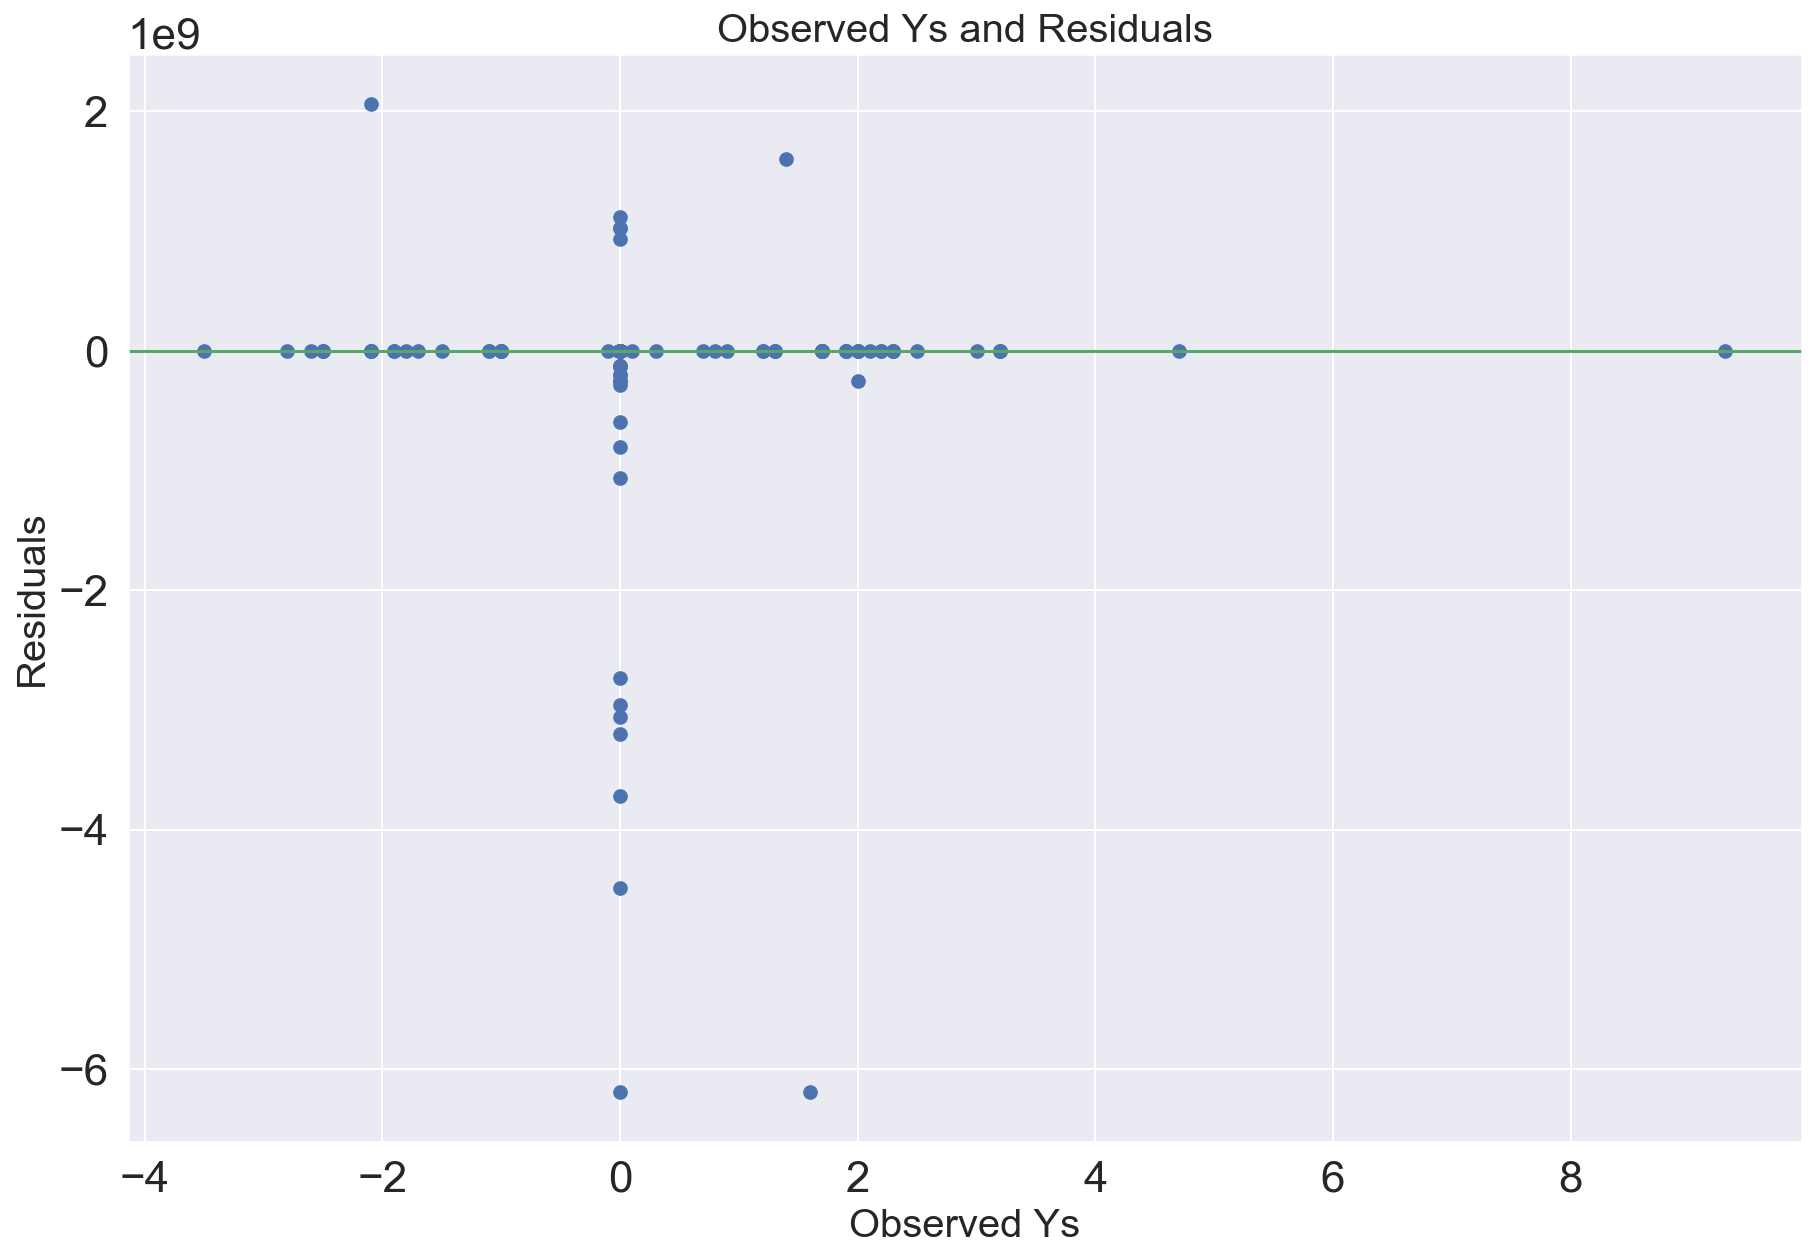

In [93]:
plt.scatter(Y_test, residuals, s = 40)
sns.set(rc={'figure.figsize':(8,5)})
sns.set(font_scale = 2)
plt.axhline(0, color = 'g')
plt.title("Observed Ys and Residuals", fontsize = 20)
plt.ylabel("Residuals", fontsize = 20)
plt.xlabel("Observed Ys", fontsize = 20)

Turns out we can't predict polarity that well without the message or response. 

In [94]:
def mse(actual_y, predicted_y):
    return np.mean((predicted_y - actual_y)**2)
def mae(actual_y, predicted_y):
    return np.mean(abs(predicted_y - actual_y))

In [95]:
train_error = mse(Y_train, model.predict(X_train))
test_error =  mse(Y_test,model.predict(X_test))
print(train_error, test_error)

train_error = mae(Y_train, model.predict(X_train))
test_error =  mae(Y_test,model.predict(X_test))
print(train_error, test_error)

0.2859418507229204 2.495335659480064e+17
0.23876192091571907 69771337.86271161


#### Negative Sentiment
This is a data entry by the department and not something viewed from the data. Lets remove it and see how we do.

In [96]:
one_hot2 = pd.get_dummies(data[["Response Type",
                               "Response Group",
                               "Message Type",
                               "word_count",
                               "polarity", 
                              "hour",
                              "day_of_week"]])
one_hot2.dropna(inplace = True)
one_hot2.head()

,word_count,polarity,hour,Response Type_18 Below Home,Response Type_18 Below Hours,Response Type_2 MetroTech Center Address,Response Type_24 Hour Eateries,Response Type_2nd St Address,Response Type_2nd St Menu,Response Type_3N Address,...,Response Group_Weather,Message Type_Button,Message Type_Freeform,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
id,,,,,,,,,,,,,,,,,,,,,
0,2,-1.5,11.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,-3.7,12.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,3,0.0,12.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0.0,12.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,3,0.0,13.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [97]:
# Create training and test sets

# Droping desired outcome polarity
X2 = one_hot2.drop(columns=['polarity'])
Y2 = one_hot2['polarity']

# Creating sets: Train 90 , Test 10
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.10)

In [98]:
# Create model off of training set
model = LinearRegression().fit(X_train2, Y_train2)

In [99]:
# create predictors
Y_pred2 = model.predict(X_test2)

# find residuals
residuals2 = Y_pred2 - Y_test2

Text(0.5, 0, 'Observed Ys')

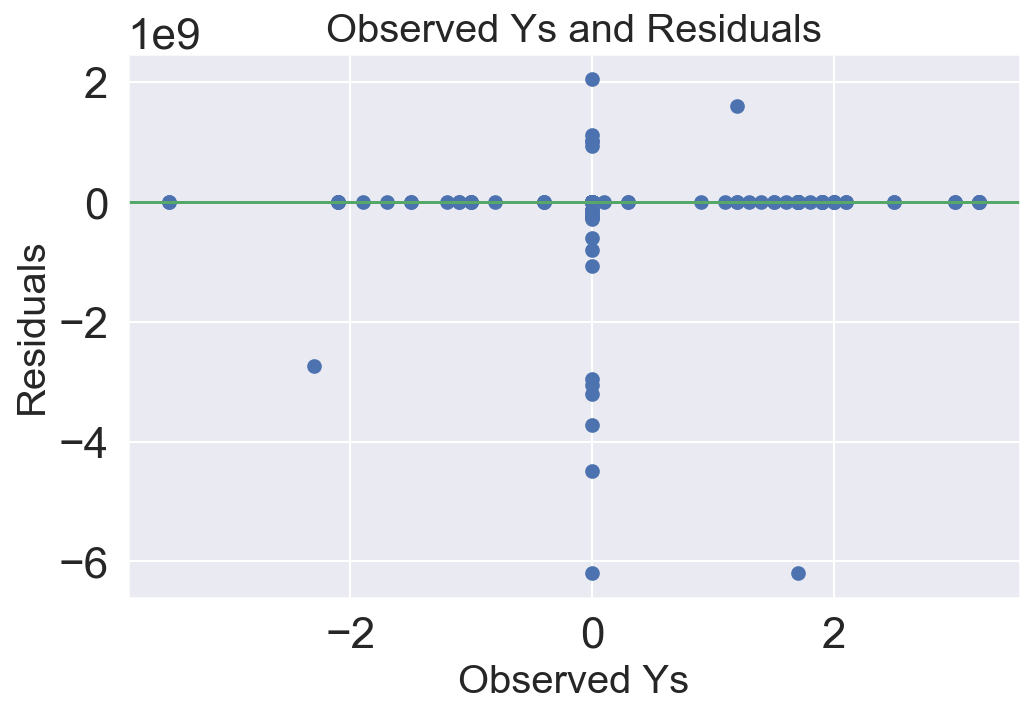

In [100]:
plt.scatter(Y_test2, residuals, s = 40)
plt.axhline(0, color = 'g')
plt.title("Observed Ys and Residuals", fontsize = 20)
plt.ylabel("Residuals", fontsize = 20)
plt.xlabel("Observed Ys", fontsize = 20)

In [101]:
train_error2 = mse(Y_train2, model.predict(X_train2))
test_error2 =  mse(Y_test2,model.predict(X_test2))
print(train_error2, test_error2)

0.3078364236628035 1.1205907762727688e+17


Removing negative sentiment increased the training error but reduced the test error. 

## Linear Regression with Polarity and Word_Count

### Visualizing the Association between word_count and polarity

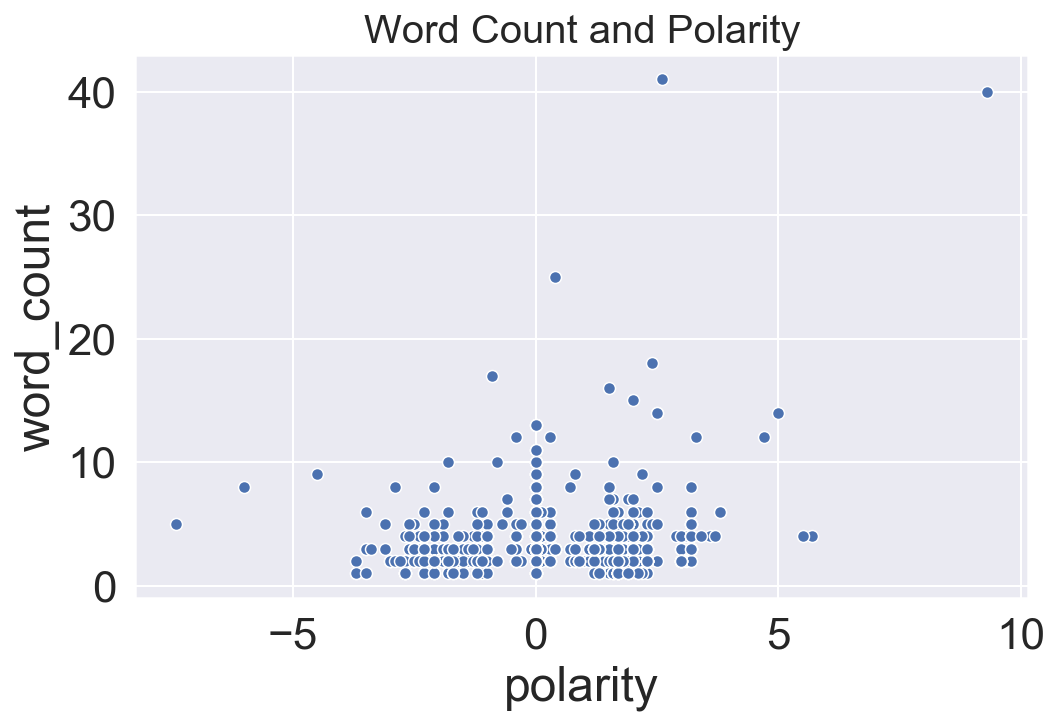

In [102]:
sns.scatterplot(x = 'polarity', y= 'word_count', data = data, y_jitter = .2, x_jitter = .2)
sns.set(rc={'figure.figsize':(8,6)})
plt.title("Word Count and Polarity", fontsize = 20)
sns.set(font_scale = 2)

In [103]:
#Conducitng a linear regression with word_count as the IV
results = smf.ols('polarity ~ word_count', data=data).fit()
results.summary() #Showing the results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               polarity   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     210.2
Date:                Thu, 14 May 2020   Prob (F-statistic):           6.82e-47
Time:                        14:42:43   Log-Likelihood:                -6615.8
No. Observations:                6405   AIC:                         1.324e+04
Df Residuals:                    6403   BIC:                         1.325e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1258      0.016     -7.777      0.000      -0.158      -0.094
word_count     0.0854      0.006     14.498      0.000       0.074       0.097
==============================================================================
Omnibus:                     1871.100   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62477.716
Skew:                           0.744   Prob(JB):                         0.00
Kurtosis:                      18.228   Cond. No.                         5.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretting the coefficient, confidence interval, and p-value for the coefficient on x. 

- Coefficient: If the word_count is changed by 1 there will be a .05 change in the polarity score.

- Confidence Interval: We can say that if we did studied the association between word_count and polarity many times the percentage of times the confidence interval will contain the true slope will be 95% of the time.

     - The Confidence Interval of [.022, .09] does not contain 0 so we can reject the null with a 95% confidence. 

- P value: the probabilty of having a correct NULL hypothesis (Saying there is no relationship between word_count and polarity) is 001. With that information and the Confidence interval we can Reject the Null Hypothesis

- BUT because we have a low R-Squared value of .005 that indicates that the word_count is not that good at explaining the variation in the polarity score. 

## Prediction By Classification

In [104]:
data.head()

,Timestamp,Message,Message Type,Response,Response Type,Response Group,Response Accuracy,Accuracy Diagnosis,Fixed or Improved,Negative Sentiment,Notes,word_count,day_of_week,hour,Date,polarity
id,,,,,,,,,,,,,,,,
0,2019-02-12 11:19:00,im lonely,Freeform,Sometimes that happens. We can chat a bit if t...,Small Talk,Small Talk,Full,NaN,False,True,NaN,2,Tuesday,11.0,2019-02-12,-1.5
1,2019-02-12 12:13:00,kill,Freeform,If you or another are in a life- or limb-threa...,Emergency,Emergency,Full,NaN,False,True,Reached out to this user to confirm this was t...,1,Tuesday,12.0,2019-02-12,-3.7
2,2019-02-12 12:14:00,self development,Button,For questions about self-development:,Development Menu,Development,Full,NaN,False,False,NaN,3,Tuesday,12.0,2019-02-12,0.0
3,2019-02-12 12:14:00,,Freeform,Yikes! I couldn't find that. Want me to connec...,Fallback,Fallback,None,No content,False,False,Do you know Japanese? according to Google Tran...,1,Tuesday,12.0,2019-02-12,NaN
4,2019-02-12 12:29:00,bus,Freeform,Route A offers transportation between Washingt...,Bus A,Public Safety,Full,NaN,False,False,NaN,1,Tuesday,12.0,2019-02-12,0.0


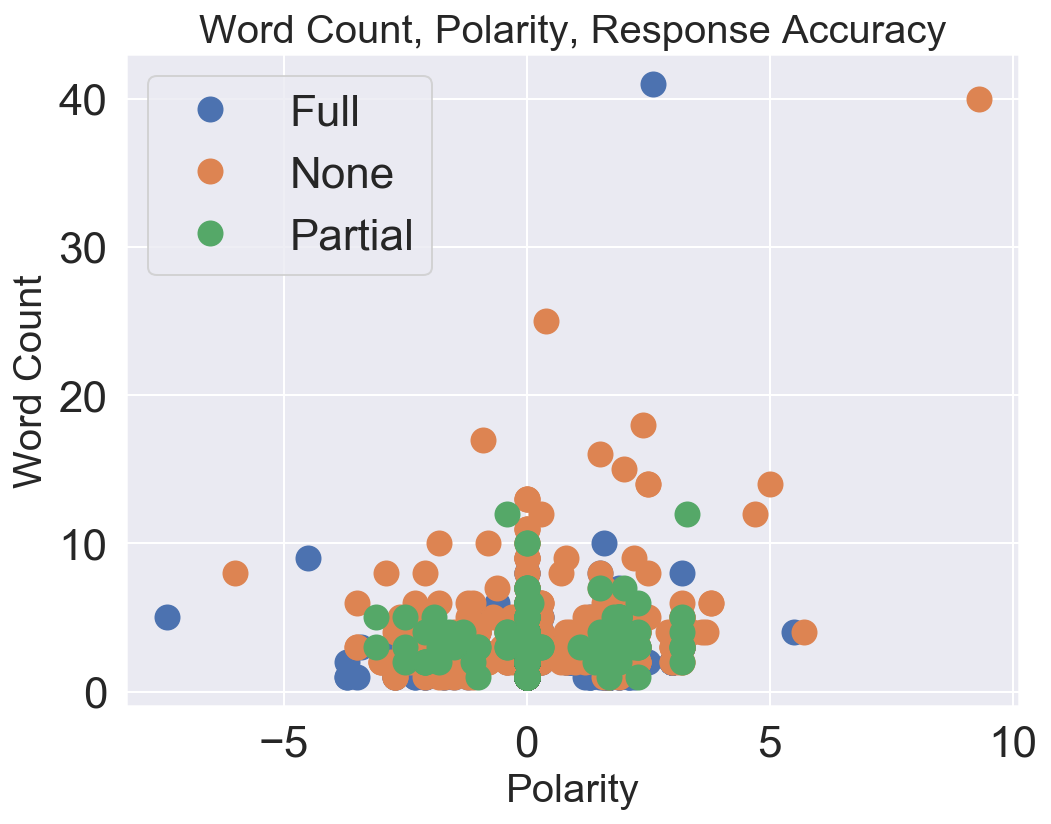

In [105]:
# draw a scatter plot

groups = data[["polarity", "Response Accuracy", "word_count"]].groupby('Response Accuracy')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.polarity, group.word_count, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.title("Word Count, Polarity, Response Accuracy", fontsize = 20)
plt.ylabel("Word Count", fontsize = 20)
plt.xlabel("Polarity", fontsize = 20)
plt.show()

#plt.scatter(data['polarity'], data['word_count'], hue=data['Response Accuracy'])

In [106]:
# create decision boundary

# first let's make a bunch of points that we need to classify
x_array = np.array()
y_array = np.array()
for x in np.arange(-2, 2.1, 0.1):
    for y in np.arange(-2, 2.1, 0.1):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)
        
test_grid = Table().with_columns(
    'Polarity', x_array,
    'word_count', y_array
)


TypeError: array() missing required argument 'object' (pos 1)

In [ ]:
# make function to classify new people
def classify_grid(training, test, k):
    c = make_array()
    for i in range(test.num_rows):
        # Run the classifier on the ith patient in the test set
        c = np.append(c, classify(training, make_array(test.row(i)), k))   
    return c

#classify all the points with respect to their nearest neighbor 
# (note need to drop color/status variables here)
c = classify_grid(data.drop('Accuracy','Color'), test_grid, 1)

In [ ]:
#now draw the test set in terms of its colors (based on NN), but wash it out w alpha coloring
test_grid.scatter('Age', 'Sodium', group='status', alpha=0.4, s=30)
# on top of that, plot the *actual* points
plots.scatter(ckd_small.column('Age'), ckd_small.column('Sodium'), c=ckd_small.column('Color'), edgecolor='k')
plots.xlim(-2, 2)
plots.ylim(-2, 2); #the boundary is being drawn in the restricted -2,2 space